# <center> **Proyecto SmartWaste**</center>

La gestión eficiente de residuos es un desafío clave para las ciudades modernas, y Madrid no es la excepción. El crecimiento urbano, el aumento del consumo y la variabilidad en la generación de desechos hacen necesario un enfoque basado en datos para optimizar la recolección y distribución de contenedores.

El proyecto SmartWaste busca analizar patrones de generación de residuos en diferentes distritos de Madrid, utilizando herramientas de análisis de datos y visualización como Power BI y Streamlit. A través del estudio de datos históricos y modelos predictivos, identificamos oportunidades para mejorar la eficiencia de la recolección de basura, reducir costos operativos y minimizar el impacto ambiental.

En este notebook, os presentamos nuestro análisis realizado, los hallazgos clave y las recomendaciones para una gestión de residuos más inteligente y sostenible. 🚛♻️ 


In [1]:
# Importación de las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import json
import folium
from scipy import stats
import statsmodels.api as sm

### **1. Procesamiento y Limpieza de Datos:**

In [3]:
# Obtener el directorio actual del notebook
current_dir = os.getcwd()

# Construir las rutas relativas a los archivos CSV
path_2022 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2022.csv')
path_2023 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2023.csv')
path_2024 = os.path.join(current_dir, 'DATA/Actuaciones_limpieza_urbana_2024.csv')

# Lectura de los archivos csv
df2022 = pd.read_csv(path_2022, delimiter=';')
df2023 = pd.read_csv(path_2023, delimiter=';')
df2024 = pd.read_csv(path_2024, delimiter=';', encoding='latin-1')


In [4]:
# Añadir columna de año
df2022['Año'] = '2022'
df2023['Año'] = '2023'
df2024['Año'] = '2024'

# Concatenar los DataFrames
df_combined = pd.concat([df2022, df2023, df2024], ignore_index=True)

# Mostrar el DataFrame combinado
print(df_combined.head())

     MES  LOTE  COD_DISTRITO    DISTRITO  MUEBLES 010      \
0  ENERO     1             1     CENTRO            35.120   
1  ENERO     1             6      TETUÁN           11.960   
2  ENERO     1             7    CHAMBERÍ           11.844   
3  ENERO     2             2  ARGANZUELA           23.760   
4  ENERO     2             3      RETIRO            6.620   

   MUEBLES RECOG. PROGRAMADA   MUEBLES RECOG. EN CALLE               \
0                        7.84                                 3.090   
1                       10.76                                 1.200   
2                        3.10                                 1.316   
3                        0.00                                 0.000   
4                        0.00                                 0.000   

   Kg Recogida de muebles  RESTO              \
0                   46.05               0.00   
1                   23.92               0.00   
2                   16.26               0.00   
3             

In [5]:
df_combined.shape

(756, 38)

In [6]:
df_combined.columns

Index(['MES', 'LOTE', 'COD_DISTRITO', 'DISTRITO', 'MUEBLES 010    ',
       'MUEBLES RECOG. PROGRAMADA ', 'MUEBLES RECOG. EN CALLE             ',
       'Kg Recogida de muebles', 'RESTO            ',
       'ORGÁNICA   (HOJAS Y RAMAS)                 ', 'ENVASES         ',
       'PAPEL Y CARTÓN', 'VARIOS/RCDs CÓD DESTINO: VERLD',
       'Kg Recogida Residuos Viarios', 'Nº Servicios Barrido Manual',
       'Nº Servicios Barrido Mantenimiento', 'Nº Servicios Barrido Mecánico',
       'Nº Servicios Barrido Mixto', 'Nº Servicios Baldeo Mecánico',
       'Nº Servicios Baldeo Mixto', 'Nº Servicios Hidrolimpiador (Manchas)',
       'Nº Servicios Eliminación Grafitis', 'M2 Eliminación Grafitis',
       'Ud Reposición Bolsas Caninas', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Año'],
      dtype='object')

In [7]:
# Eliminar columnas que comienzan por 'Unnamed'

df_combined = df_combined.loc[:, ~df_combined.columns.str.contains('^Unnamed')]
df_combined.columns

Index(['MES', 'LOTE', 'COD_DISTRITO', 'DISTRITO', 'MUEBLES 010    ',
       'MUEBLES RECOG. PROGRAMADA ', 'MUEBLES RECOG. EN CALLE             ',
       'Kg Recogida de muebles', 'RESTO            ',
       'ORGÁNICA   (HOJAS Y RAMAS)                 ', 'ENVASES         ',
       'PAPEL Y CARTÓN', 'VARIOS/RCDs CÓD DESTINO: VERLD',
       'Kg Recogida Residuos Viarios', 'Nº Servicios Barrido Manual',
       'Nº Servicios Barrido Mantenimiento', 'Nº Servicios Barrido Mecánico',
       'Nº Servicios Barrido Mixto', 'Nº Servicios Baldeo Mecánico',
       'Nº Servicios Baldeo Mixto', 'Nº Servicios Hidrolimpiador (Manchas)',
       'Nº Servicios Eliminación Grafitis', 'M2 Eliminación Grafitis',
       'Ud Reposición Bolsas Caninas', 'Año'],
      dtype='object')

In [8]:
# Identificar valores nulos en las columnas y filas

df_combined.isnull().sum()

MES                                             0
LOTE                                            0
COD_DISTRITO                                    0
DISTRITO                                        0
MUEBLES 010                                    63
MUEBLES RECOG. PROGRAMADA                      63
MUEBLES RECOG. EN CALLE                        63
Kg Recogida de muebles                         63
RESTO                                          63
ORGÁNICA   (HOJAS Y RAMAS)                     64
ENVASES                                        63
PAPEL Y CARTÓN                                 63
VARIOS/RCDs CÓD DESTINO: VERLD                 63
Kg Recogida Residuos Viarios                   63
Nº Servicios Barrido Manual                    63
Nº Servicios Barrido Mantenimiento             63
Nº Servicios Barrido Mecánico                  63
Nº Servicios Barrido Mixto                     63
Nº Servicios Baldeo Mecánico                   63
Nº Servicios Baldeo Mixto                      63


In [9]:
# Eliminar filas que tengan más de tres columnas con valores nulos

df_combined = df_combined.dropna(thresh=len(df_combined.columns) - 3)
df_combined.isnull().sum()

MES                                            0
LOTE                                           0
COD_DISTRITO                                   0
DISTRITO                                       0
MUEBLES 010                                    0
MUEBLES RECOG. PROGRAMADA                      0
MUEBLES RECOG. EN CALLE                        0
Kg Recogida de muebles                         0
RESTO                                          0
ORGÁNICA   (HOJAS Y RAMAS)                     1
ENVASES                                        0
PAPEL Y CARTÓN                                 0
VARIOS/RCDs CÓD DESTINO: VERLD                 0
Kg Recogida Residuos Viarios                   0
Nº Servicios Barrido Manual                    0
Nº Servicios Barrido Mantenimiento             0
Nº Servicios Barrido Mecánico                  0
Nº Servicios Barrido Mixto                     0
Nº Servicios Baldeo Mecánico                   0
Nº Servicios Baldeo Mixto                      0
Nº Servicios Hidroli

In [10]:
# Mostrar cantidad de filas y columnas

df_combined.shape

(693, 25)

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 692
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   MES                                          693 non-null    object 
 1   LOTE                                         693 non-null    int64  
 2   COD_DISTRITO                                 693 non-null    int64  
 3   DISTRITO                                     693 non-null    object 
 4   MUEBLES 010                                  693 non-null    float64
 5   MUEBLES RECOG. PROGRAMADA                    693 non-null    float64
 6   MUEBLES RECOG. EN CALLE                      693 non-null    float64
 7   Kg Recogida de muebles                       693 non-null    float64
 8   RESTO                                        693 non-null    float64
 9   ORGÁNICA   (HOJAS Y RAMAS)                   692 non-null    float64
 10  ENVASES

In [12]:
# Cambiar nombre de las columnas para que sean más homogeneas

df_combined.columns = df_combined.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_combined.columns

Index(['mes', 'lote', 'cod_distrito', 'distrito', 'muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'kg_recogida_de_muebles', 'resto', 'orgánica___hojas_y_ramas',
       'envases', 'papel_y_cartón', 'varios/rcds_cód_destino:_verld',
       'kg_recogida_residuos_viarios', 'nº_servicios_barrido_manual',
       'nº_servicios_barrido_mantenimiento', 'nº_servicios_barrido_mecánico',
       'nº_servicios_barrido_mixto', 'nº_servicios_baldeo_mecánico',
       'nº_servicios_baldeo_mixto', 'nº_servicios_hidrolimpiador_manchas',
       'nº_servicios_eliminación_grafitis', 'm2_eliminación_grafitis',
       'ud_reposición_bolsas_caninas', 'año'],
      dtype='object')

In [13]:
# Renombrar las siguientes columnas

df_combined = df_combined.rename(columns={
    'kg_recogida_de_muebles': 'total_kg_recogida_de_muebles',
    'resto': 'residuos_varios_viapublica_resto',
    'orgánica___hojas_y_ramas': 'orgánica_hojas_y_ramas',
    'varios/rcds_cód_destino:_verld': 'varios_residuos_de_construcción_y_demolición'
})

df_combined.columns

Index(['mes', 'lote', 'cod_distrito', 'distrito', 'muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto',
       'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón',
       'varios_residuos_de_construcción_y_demolición',
       'kg_recogida_residuos_viarios', 'nº_servicios_barrido_manual',
       'nº_servicios_barrido_mantenimiento', 'nº_servicios_barrido_mecánico',
       'nº_servicios_barrido_mixto', 'nº_servicios_baldeo_mecánico',
       'nº_servicios_baldeo_mixto', 'nº_servicios_hidrolimpiador_manchas',
       'nº_servicios_eliminación_grafitis', 'm2_eliminación_grafitis',
       'ud_reposición_bolsas_caninas', 'año'],
      dtype='object')

In [14]:
# Concatenar la columna año y mes en una nueva columna llamada "mes_año"
df_combined['mes_año'] = df_combined['mes'] + '_' + df_combined['año']

# Mostrar las primeras filas para verificar
df_combined[['mes', 'año', 'mes_año']].head()

mes   año     mes_año
0  ENERO  2022  ENERO_2022
1  ENERO  2022  ENERO_2022
2  ENERO  2022  ENERO_2022
3  ENERO  2022  ENERO_2022
4  ENERO  2022  ENERO_2022

### **2. Análisis explotario de datos (EDA)**

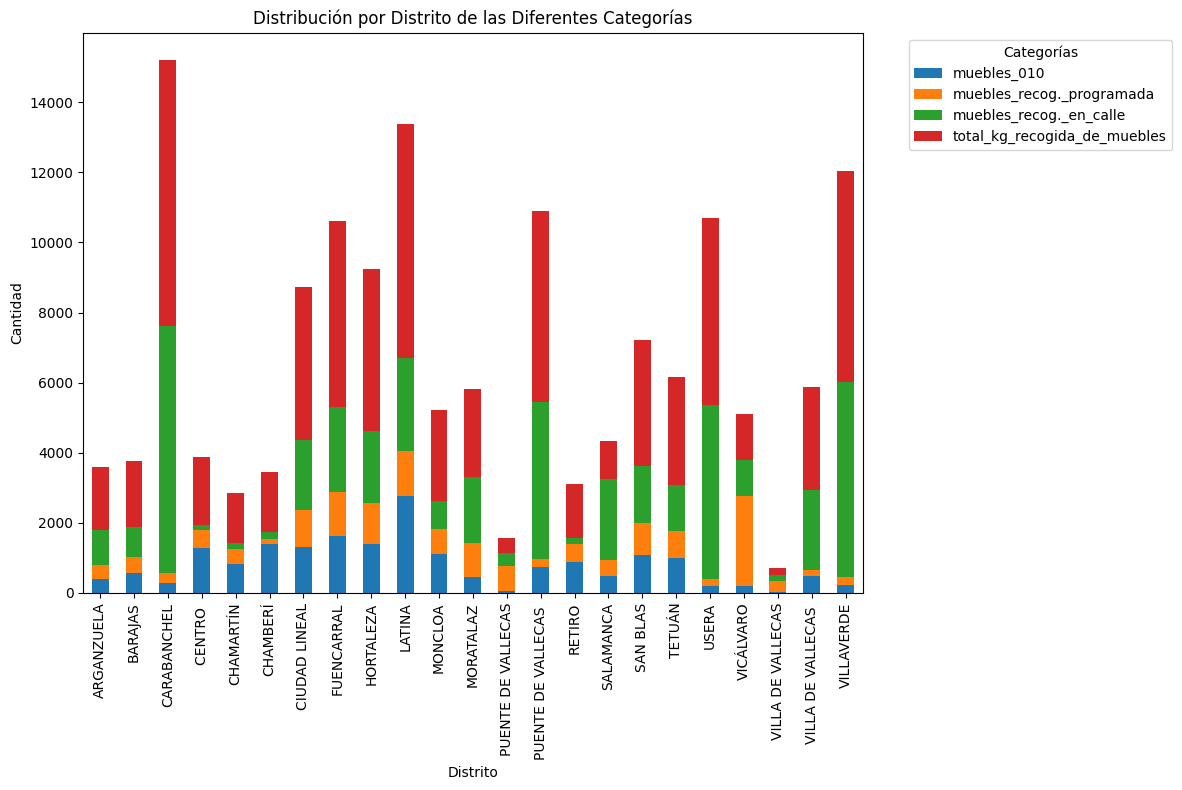

In [15]:
# Grafico para ver la cantidad de recolección de muebles por distrito

# Seleccionar las columnas relevantes para el gráfico
categorias = ['muebles_010',
       'muebles_recog._programada', 'muebles_recog._en_calle',
       'total_kg_recogida_de_muebles']

# Agrupar por distrito y sumar las categorías
df_distrito = df_combined.groupby('distrito')[categorias].sum()

# Crear el gráfico apilado
df_distrito.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución por Distrito de las Diferentes Categorías')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

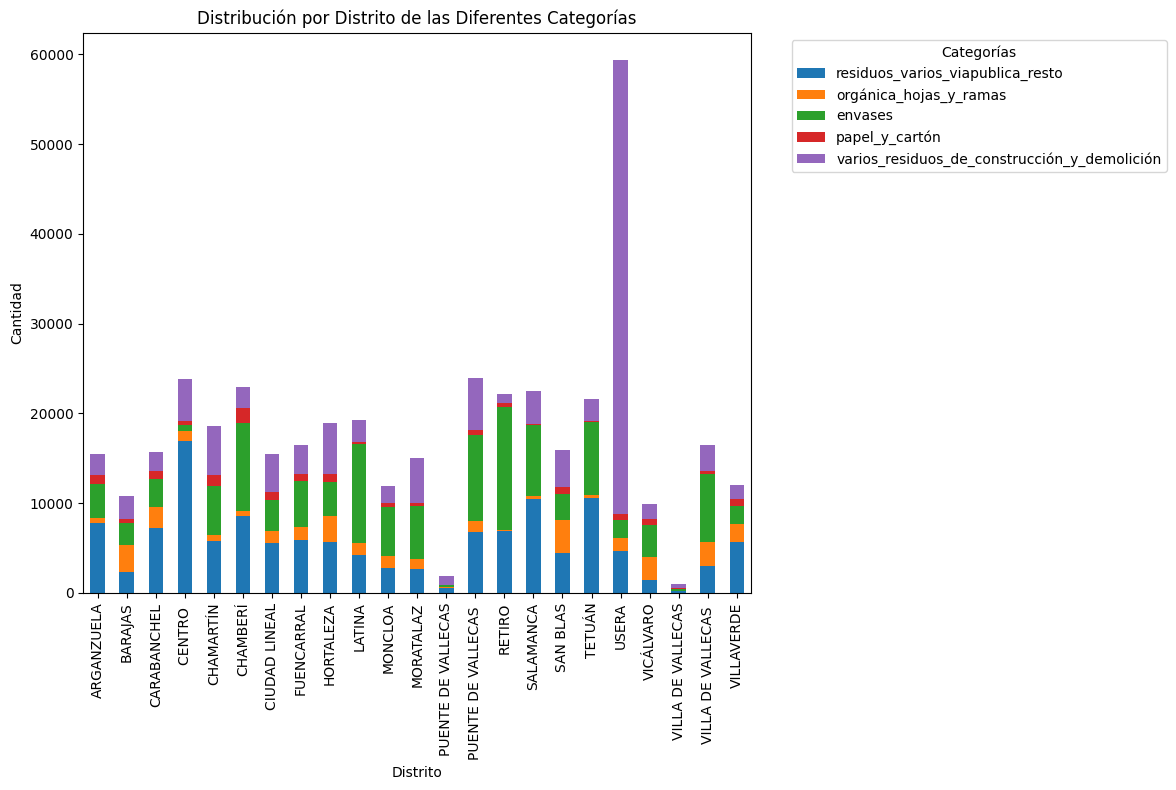

In [16]:
# Grafico para ver la cantidad de recolección de muebles por distrito

# Seleccionar las columnas relevantes para el gráfico
categorias = ['residuos_varios_viapublica_resto',
       'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón',
       'varios_residuos_de_construcción_y_demolición']

# Agrupar por distrito y sumar las categorías
df_distrito = df_combined.groupby('distrito')[categorias].sum()

# Crear el gráfico apilado
df_distrito.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir título y etiquetas
plt.title('Distribución por Distrito de las Diferentes Categorías')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

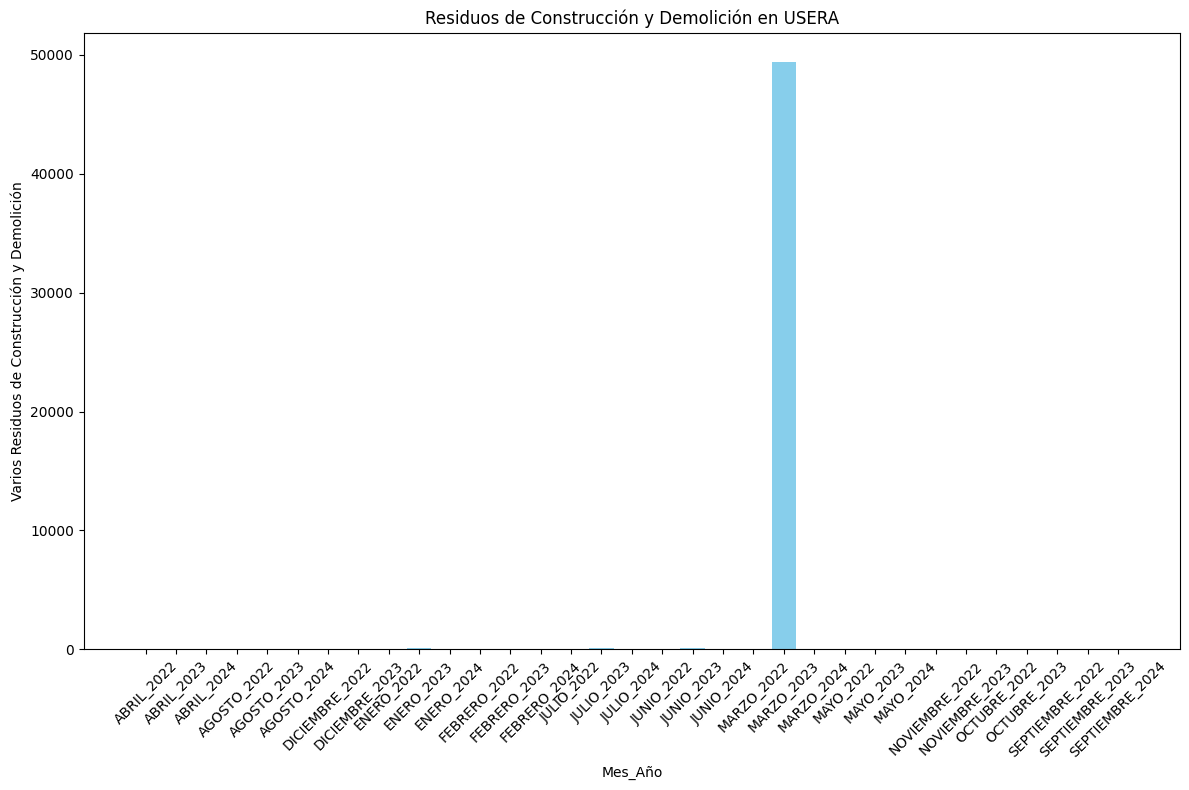

In [17]:
# Seleccionar el distrito 'USERA' y la columna "varios_residuos_de_construcción_y_demolición" y dividirlo por año_mes . Graficar eje x "año_mes" y eje y "varios_residuos_de_construcción_y_demolición"

# Seleccionar el distrito 'USERA'
df_usera = df_combined[df_combined['distrito'] == 'USERA']

# Seleccionar las columnas relevantes
df_usera = df_usera[['mes_año', 'varios_residuos_de_construcción_y_demolición']]
df_usera = df_usera.sort_values('mes_año')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_usera['mes_año'], df_usera['varios_residuos_de_construcción_y_demolición'], color='skyblue')

# Añadir título y etiquetas
plt.title('Residuos de Construcción y Demolición en USERA')
plt.xlabel('Mes_Año')
plt.ylabel('Varios Residuos de Construcción y Demolición')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

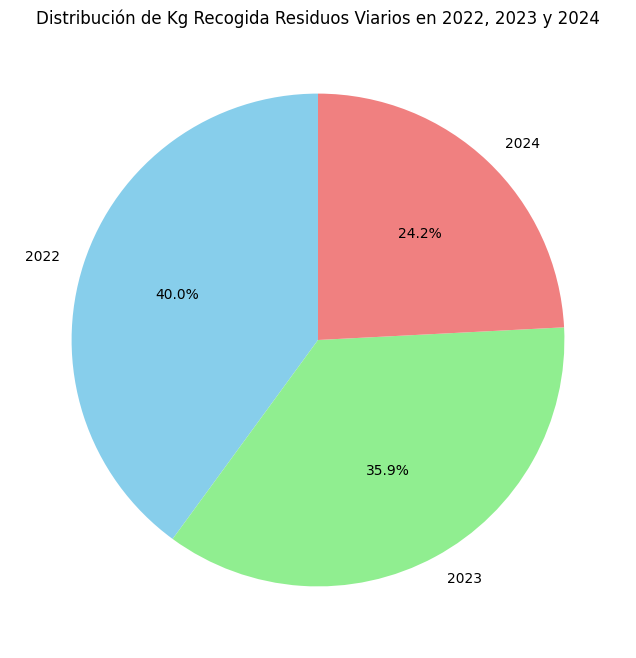

In [18]:
# Agrupar por año y sumar los kg recogidos
df_pie = df_combined.groupby('año')['kg_recogida_residuos_viarios'].sum()

# Crear el gráfico de pastel con colores diferentes para cada año
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 8))
df_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Añadir título
plt.title('Distribución de Kg Recogida Residuos Viarios en 2022, 2023 y 2024')

# Mostrar el gráfico
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

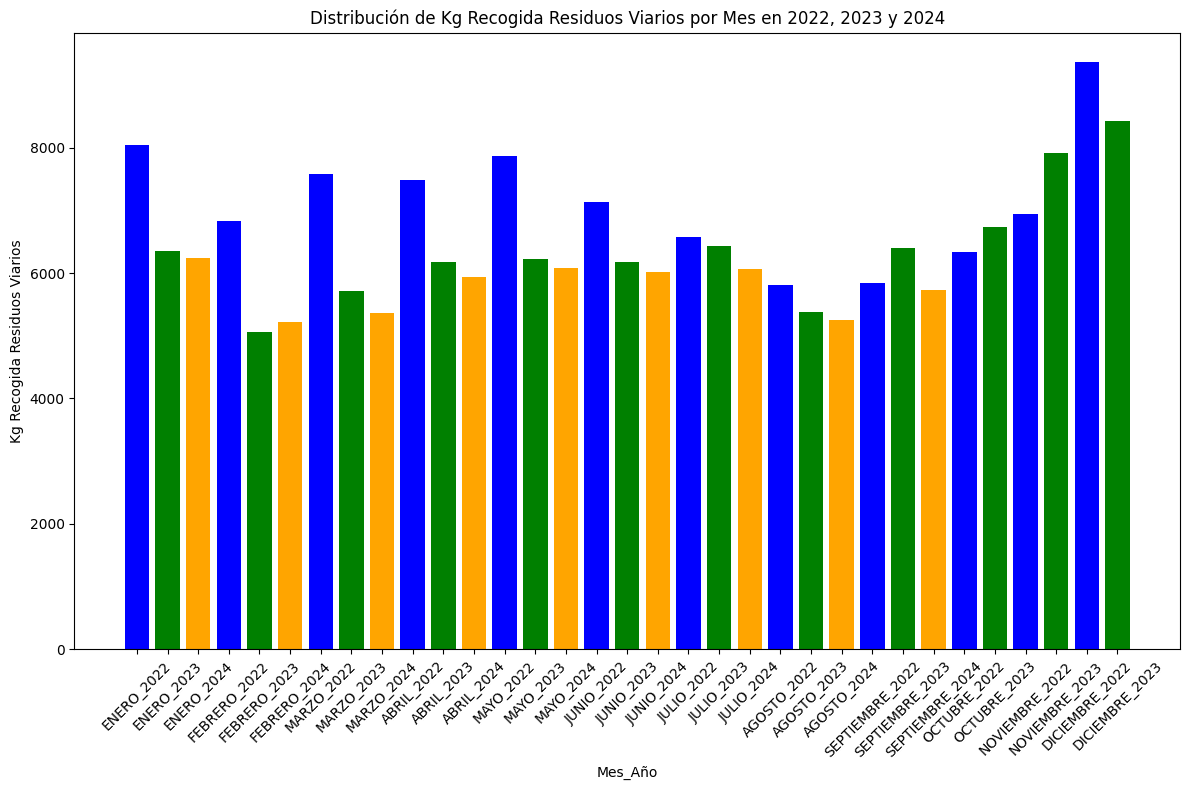

In [19]:
# Agrupar por mes y sumar los kg recogidos
df_bar = df_combined.groupby('mes_año')['kg_recogida_residuos_viarios'].sum().reset_index()

# Ordenar los datos de enero a diciembre
order = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
df_bar['mes'] = df_bar['mes_año'].str.split('_').str[0]
df_bar['año'] = df_bar['mes_año'].str.split('_').str[1]
df_bar['mes'] = pd.Categorical(df_bar['mes'], categories=order, ordered=True)
df_bar = df_bar.sort_values(['mes', 'año'])

# Crear una lista de colores para las barras
colors = ['blue' if año == '2022' else 'green' if año == '2023' else 'orange' for año in df_bar['año']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_bar['mes_año'], df_bar['kg_recogida_residuos_viarios'], color=colors)

# Añadir título y etiquetas
plt.title('Distribución de Kg Recogida Residuos Viarios por Mes en 2022, 2023 y 2024')
plt.xlabel('Mes_Año')
plt.ylabel('Kg Recogida Residuos Viarios')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **2.1 Análisis temporal:**
Crear una serie temporal de la cantidad de residuos recogidos por mes y año.

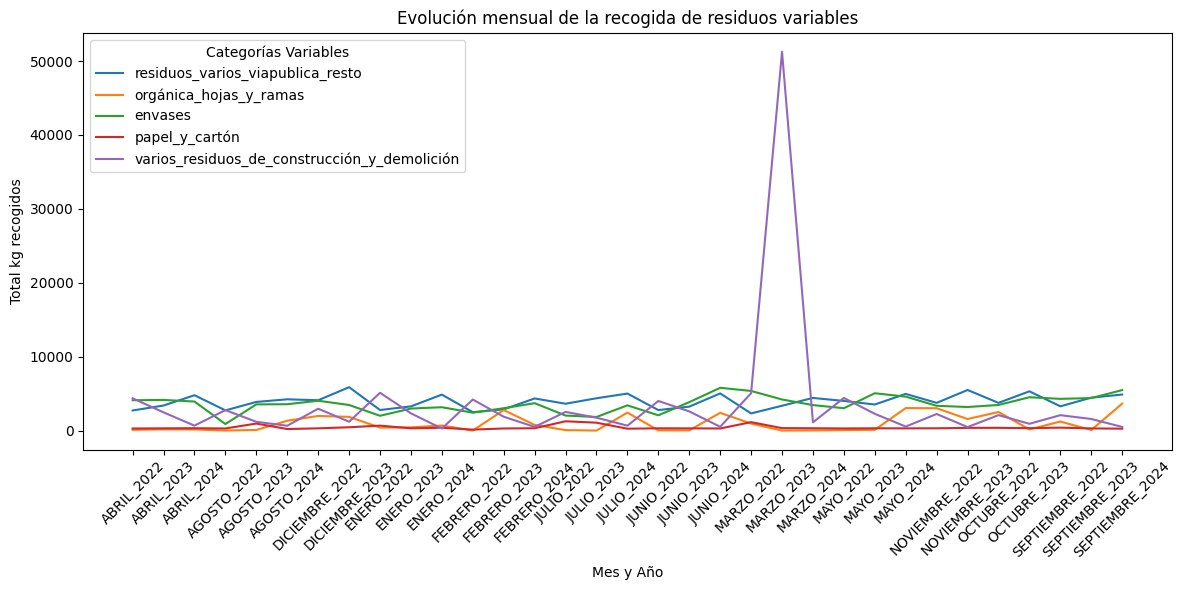

In [20]:
# Agrupar por mes_año y sumar todas las categorías de residuos variables
categorias_variables = ['residuos_varios_viapublica_resto', 'orgánica_hojas_y_ramas', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']
residuos_variables_mensuales = df_combined.groupby('mes_año')[categorias_variables].sum().sort_index()

# Crear el gráfico de líneas para cada categoría de residuos variables
plt.figure(figsize=(12, 6))
for categoria in categorias_variables:
    plt.plot(residuos_variables_mensuales.index, residuos_variables_mensuales[categoria], label=categoria)

# Añadir título y etiquetas
plt.title('Evolución mensual de la recogida de residuos variables')
plt.xlabel('Mes y Año')
plt.ylabel('Total kg recogidos')
plt.xticks(rotation=45)
plt.legend(title='Categorías Variables')
plt.tight_layout()
plt.show()

### **2.2 Análisis estacional:**
Examinar patrones estacionales en la recogida de residuos.

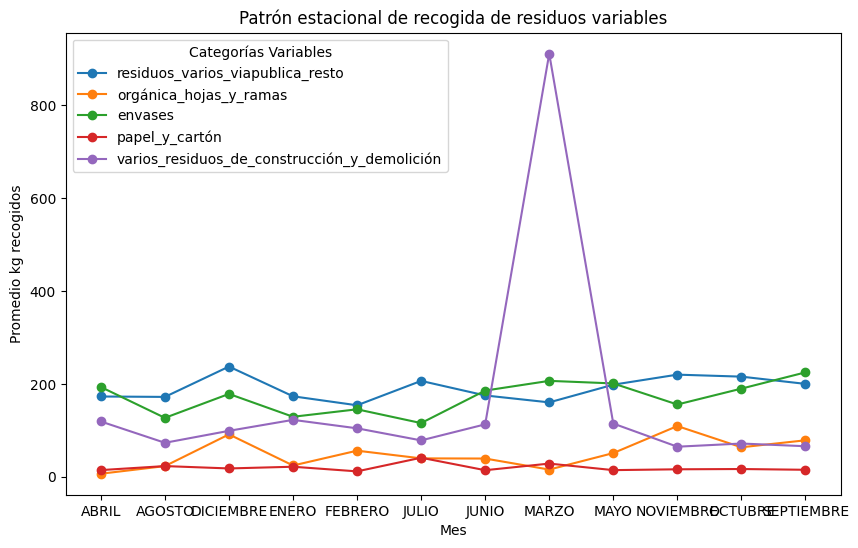

In [21]:
# Agrupar por mes y calcular la media de las categorías de residuos variables
estacionalidad_residuos = df_combined.groupby('mes')[categorias_variables].mean()

# Crear el gráfico de líneas para cada categoría de residuos variables
plt.figure(figsize=(10, 6))
for categoria in categorias_variables:
    plt.plot(estacionalidad_residuos.index, estacionalidad_residuos[categoria], marker='o', label=categoria)

# Añadir título y etiquetas
plt.title('Patrón estacional de recogida de residuos variables')
plt.xlabel('Mes')
plt.ylabel('Promedio kg recogidos')
plt.legend(title='Categorías Variables')
plt.show()


### **2.3 Correlación entre variables:**
Analizar la correlación entre diferentes tipos de residuos y servicios.

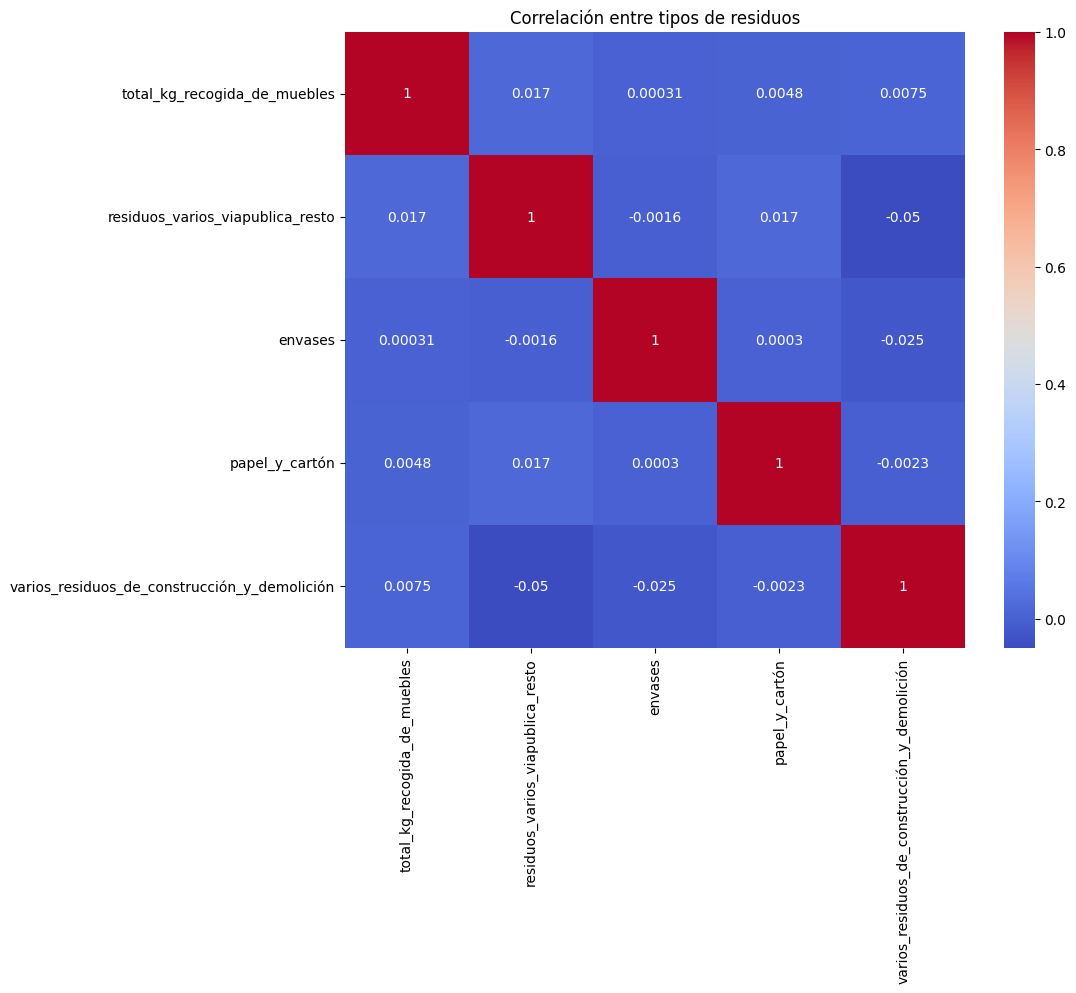

In [22]:

# Definir las columnas numéricas para calcular la correlación
columnas_numericas = ['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']

# Calcular la matriz de correlación
correlacion = df_combined[columnas_numericas].corr()

# Crear el gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Correlación entre tipos de residuos')
plt.show()


#### **Observaciones:**
No se observan correlaciones fuertes entre ningún par de variables, lo que sugiere que:
- La generación de cada tipo de residuo es relativamente independiente.
- No hay patrones claros de comportamiento conjunto entre los diferentes tipos de residuos.

### **2.4 Análisis de eficiencia:**
Calcular y visualizar la eficiencia de recogida por distrito.

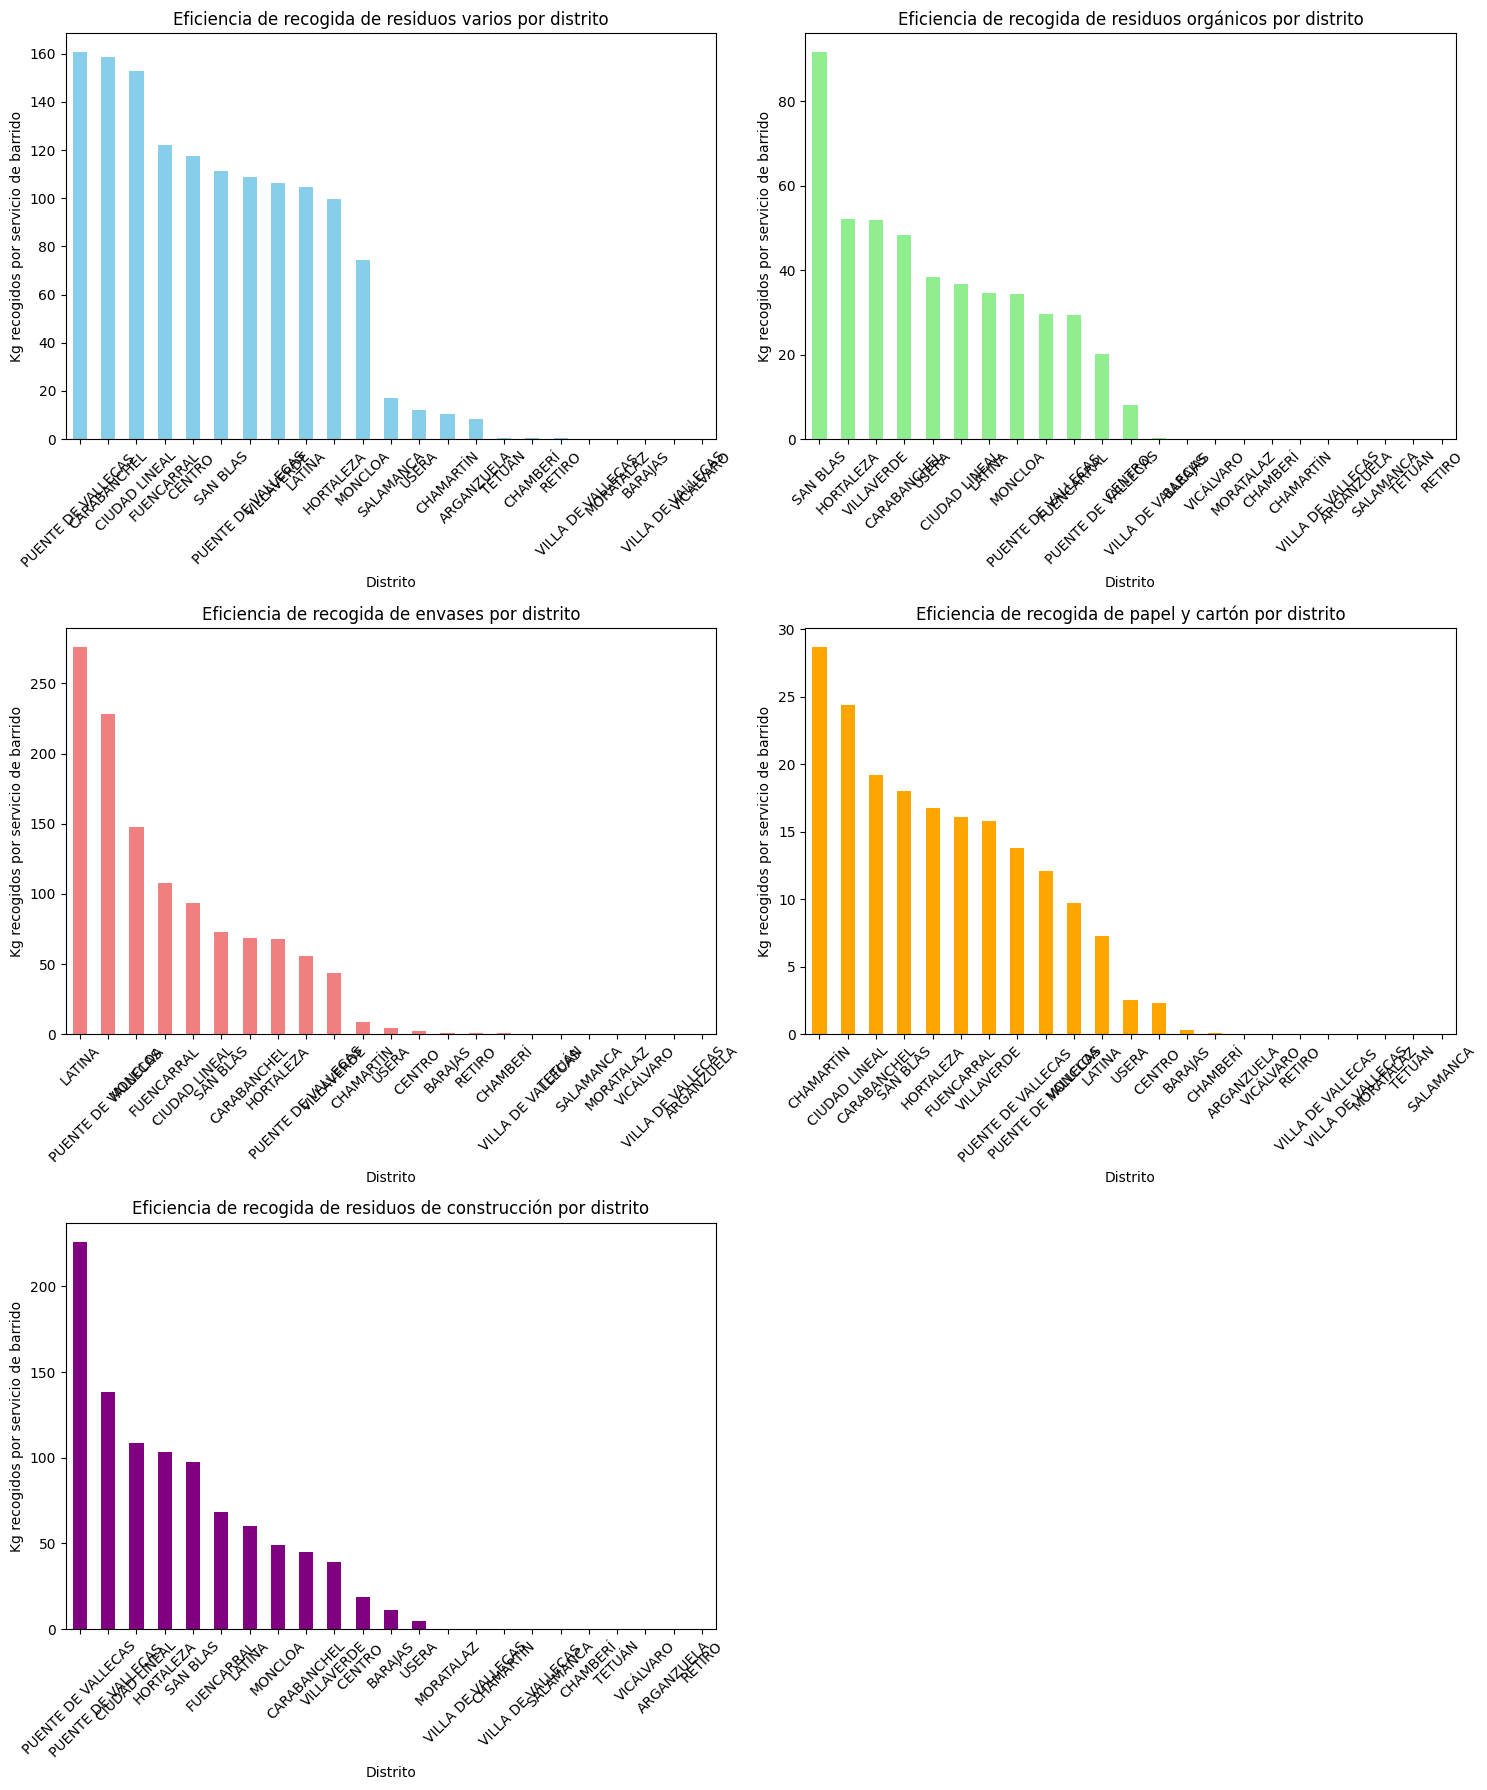

In [23]:
# Calcular la eficiencia de recogida para cada tipo de residuo
df_combined['eficiencia_residuos_varios'] = df_combined['residuos_varios_viapublica_resto'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_organica'] = df_combined['orgánica_hojas_y_ramas'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_envases'] = df_combined['envases'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_papel_carton'] = df_combined['papel_y_cartón'] / df_combined['nº_servicios_barrido_manual']
df_combined['eficiencia_residuos_construccion'] = df_combined['varios_residuos_de_construcción_y_demolición'] / df_combined['nº_servicios_barrido_manual']

# Agrupar por distrito y calcular la media de eficiencia para cada tipo de residuo
eficiencia_por_distrito_residuos_varios = df_combined.groupby('distrito')['eficiencia_residuos_varios'].mean().sort_values(ascending=False)
eficiencia_por_distrito_organica = df_combined.groupby('distrito')['eficiencia_organica'].mean().sort_values(ascending=False)
eficiencia_por_distrito_envases = df_combined.groupby('distrito')['eficiencia_envases'].mean().sort_values(ascending=False)
eficiencia_por_distrito_papel_carton = df_combined.groupby('distrito')['eficiencia_papel_carton'].mean().sort_values(ascending=False)
eficiencia_por_distrito_residuos_construccion = df_combined.groupby('distrito')['eficiencia_residuos_construccion'].mean().sort_values(ascending=False)

# Crear gráficos de barras para cada tipo de residuo
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

eficiencia_por_distrito_residuos_varios.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Eficiencia de recogida de residuos varios por distrito')
axes[0, 0].set_xlabel('Distrito')
axes[0, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[0, 0].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_organica.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Eficiencia de recogida de residuos orgánicos por distrito')
axes[0, 1].set_xlabel('Distrito')
axes[0, 1].set_ylabel('Kg recogidos por servicio de barrido')
axes[0, 1].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_envases.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Eficiencia de recogida de envases por distrito')
axes[1, 0].set_xlabel('Distrito')
axes[1, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[1, 0].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_papel_carton.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Eficiencia de recogida de papel y cartón por distrito')
axes[1, 1].set_xlabel('Distrito')
axes[1, 1].set_ylabel('Kg recogidos por servicio de barrido')
axes[1, 1].tick_params(axis='x', rotation=45)

eficiencia_por_distrito_residuos_construccion.plot(kind='bar', ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Eficiencia de recogida de residuos de construcción por distrito')
axes[2, 0].set_xlabel('Distrito')
axes[2, 0].set_ylabel('Kg recogidos por servicio de barrido')
axes[2, 0].tick_params(axis='x', rotation=45)

# Ocultar el último gráfico vacío
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


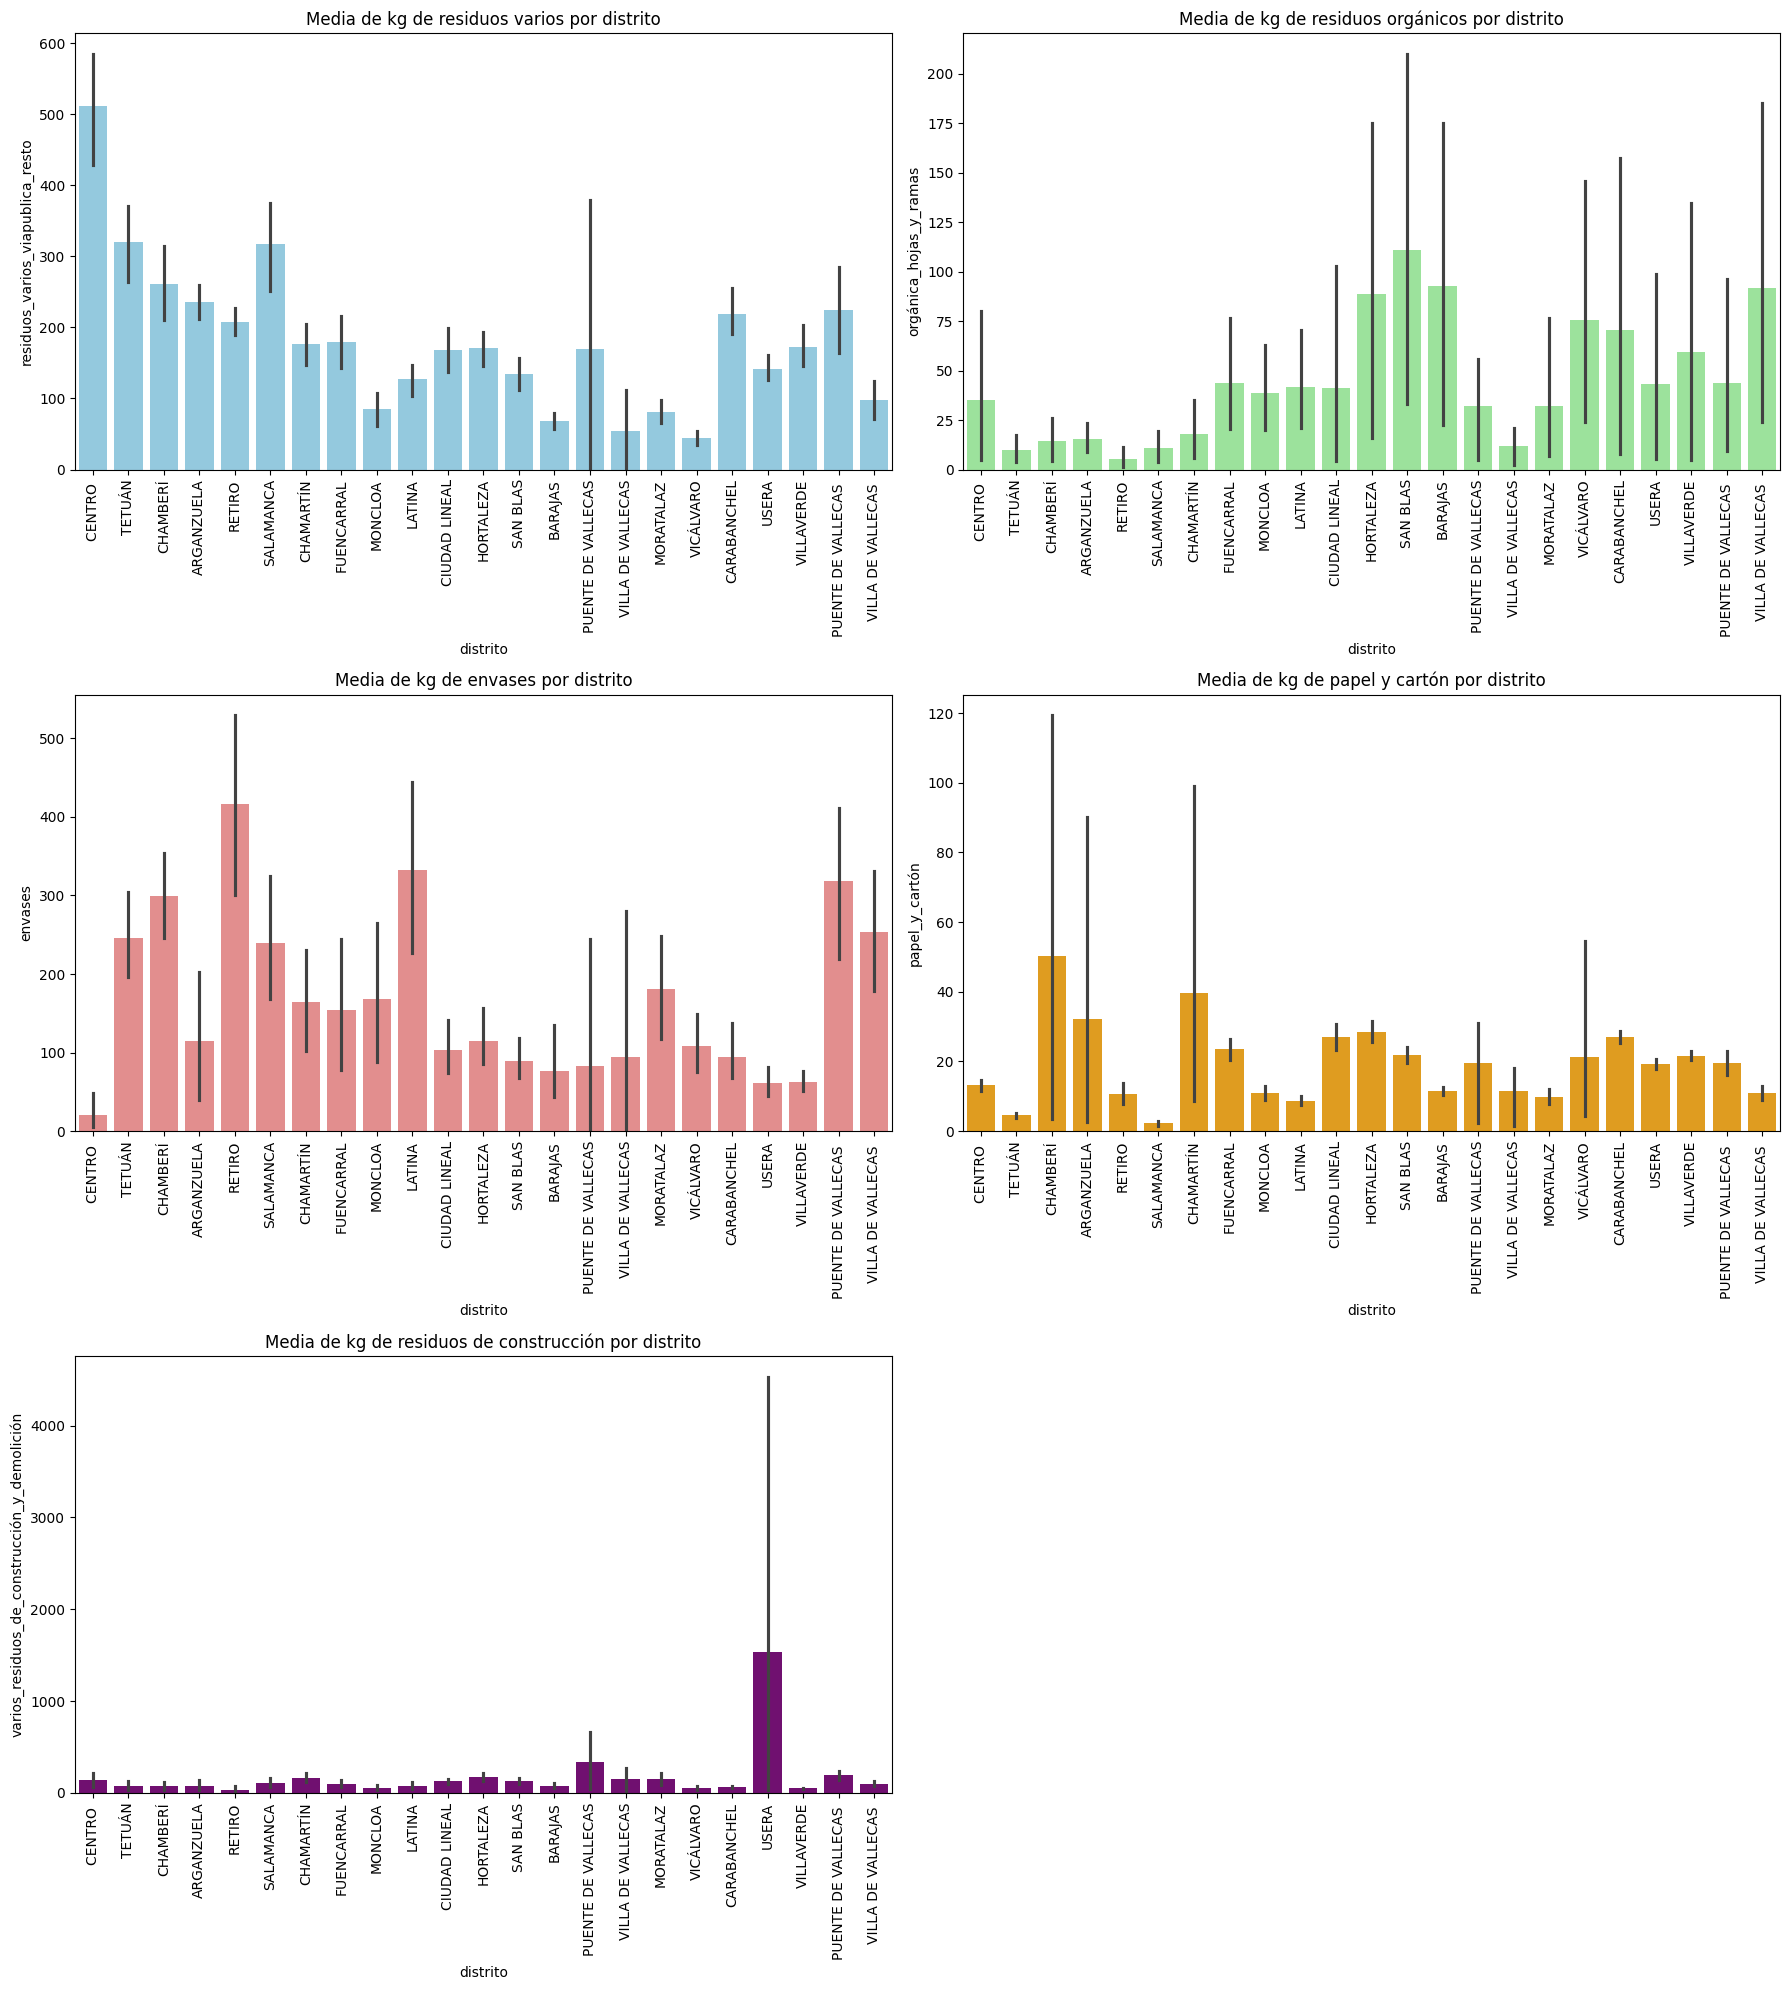


Resumen de KPIs por distrito:


NameError: name 'kpis_distrito' is not defined

In [24]:
# Crear gráficos de barras para cada tipo de residuo por distrito
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

# Residuos varios
sns.barplot(data=df_combined, x='distrito', y='residuos_varios_viapublica_resto', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Media de kg de residuos varios por distrito')
axes[0, 0].tick_params(axis='x', rotation=90)

# Orgánica
sns.barplot(data=df_combined, x='distrito', y='orgánica_hojas_y_ramas', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Media de kg de residuos orgánicos por distrito')
axes[0, 1].tick_params(axis='x', rotation=90)

# Envases
sns.barplot(data=df_combined, x='distrito', y='envases', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Media de kg de envases por distrito')
axes[1, 0].tick_params(axis='x', rotation=90)

# Papel y cartón
sns.barplot(data=df_combined, x='distrito', y='papel_y_cartón', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Media de kg de papel y cartón por distrito')
axes[1, 1].tick_params(axis='x', rotation=90)

# Residuos de construcción
sns.barplot(data=df_combined, x='distrito', y='varios_residuos_de_construcción_y_demolición', ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Media de kg de residuos de construcción por distrito')
axes[2, 0].tick_params(axis='x', rotation=90)

# Ocultar el último gráfico vacío
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Mostrar los resultados numéricos
print("\nResumen de KPIs por distrito:")
print(kpis_distrito)

#### **Residuos Varios** 🗑️
- Los distritos con mayor eficiencia son Puente de Vallecas y Villa Verde, con aproximadamente 150-160 unidades.
- Centro muestra una eficiencia notable de cerca de 120 unidades.
- Chamberí y Tetuán presentan los niveles más bajos de eficiencia, por debajo de 20 unidades.

#### **Residuos Orgánicos** 🍌
- Ciudad Lineal destaca significativamente con una eficiencia cercana a 90 unidades.
- La mayoría de los distritos mantienen niveles entre 25-50 unidades.
- Algunos distritos como Tetuán y Chamberí muestran eficiencia mínima.

#### **Envases** 📦
- Fuencarral-El Pardo muestra la mayor eficiencia, cerca de 275 unidades.
- Puente de Vallecas también destaca con aproximadamente 225 unidades.
- Se observa una gran variabilidad entre distritos, con algunos mostrando eficiencia casi nula.

#### **Papel y Cartón** 📄
- La eficiencia es generalmente más baja que otros residuos.
- Arganzuela destaca con aproximadamente 30 unidades.
- La mayoría de distritos mantienen niveles entre 10-20 unidades.

#### **Residuos de Construcción** 🏗️
- Ciudad Lineal muestra un pico significativo de eficiencia, superior a 200 unidades.
- Puente de Vallecas mantiene niveles altos.
- Existe gran variabilidad entre distritos, con algunos mostrando eficiencia muy baja.

#### **Conclusiones Generales** 
- Existe una gran disparidad en la eficiencia entre distritos.
- Algunos distritos como Puente de Vallecas y Ciudad Lineal destacan consistentemente.
- Se observan oportunidades de mejora significativas en distritos con baja eficiencia.
- La gestión de envases y residuos de construcción muestra las mayores variaciones entre distritos.

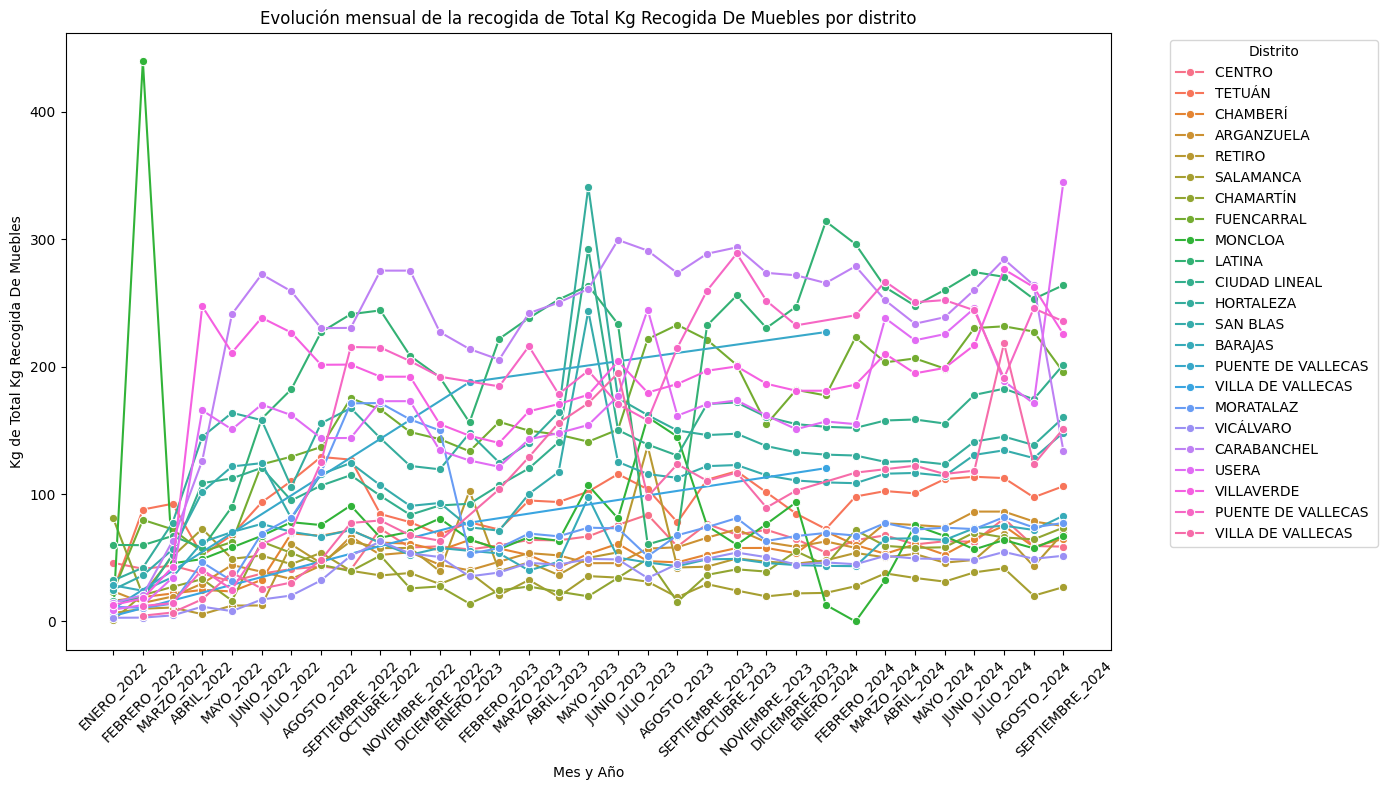

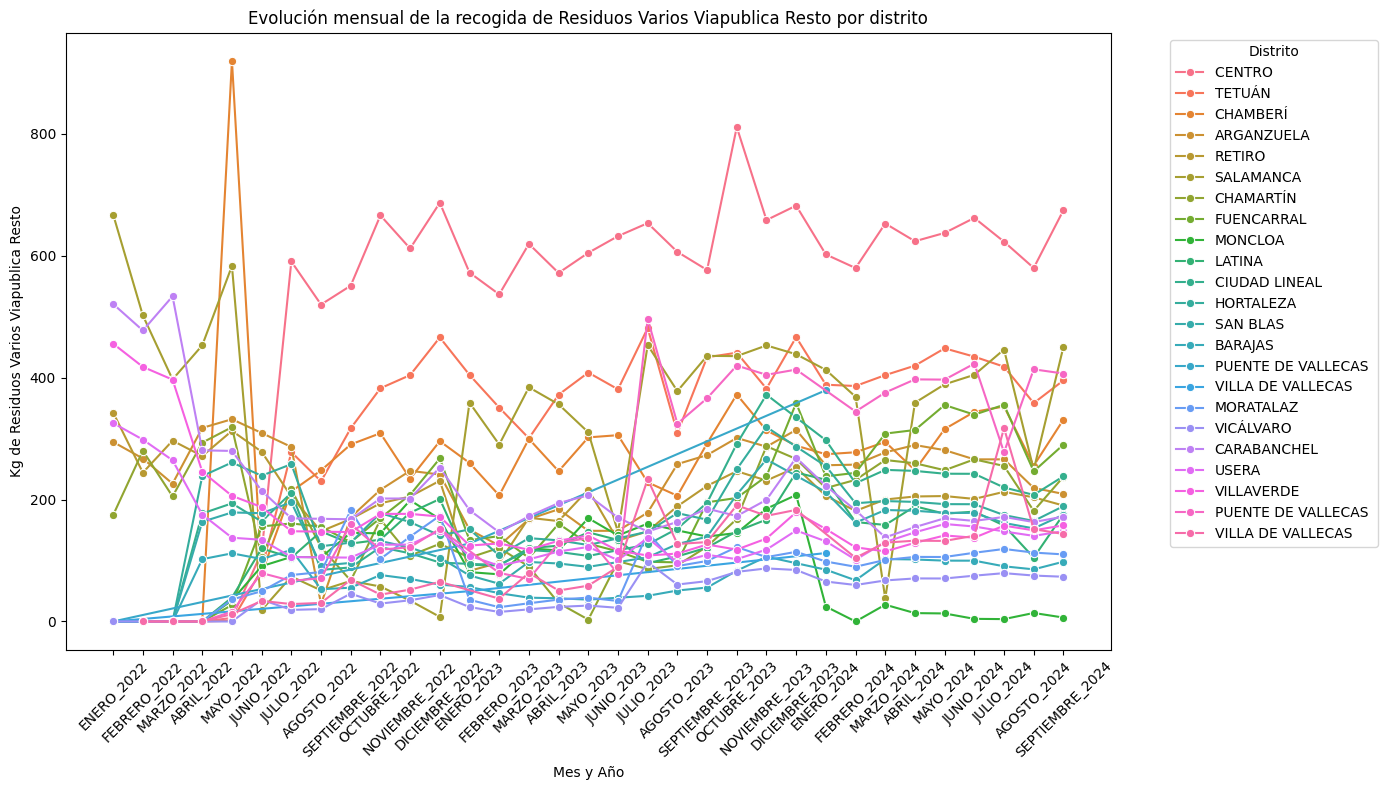

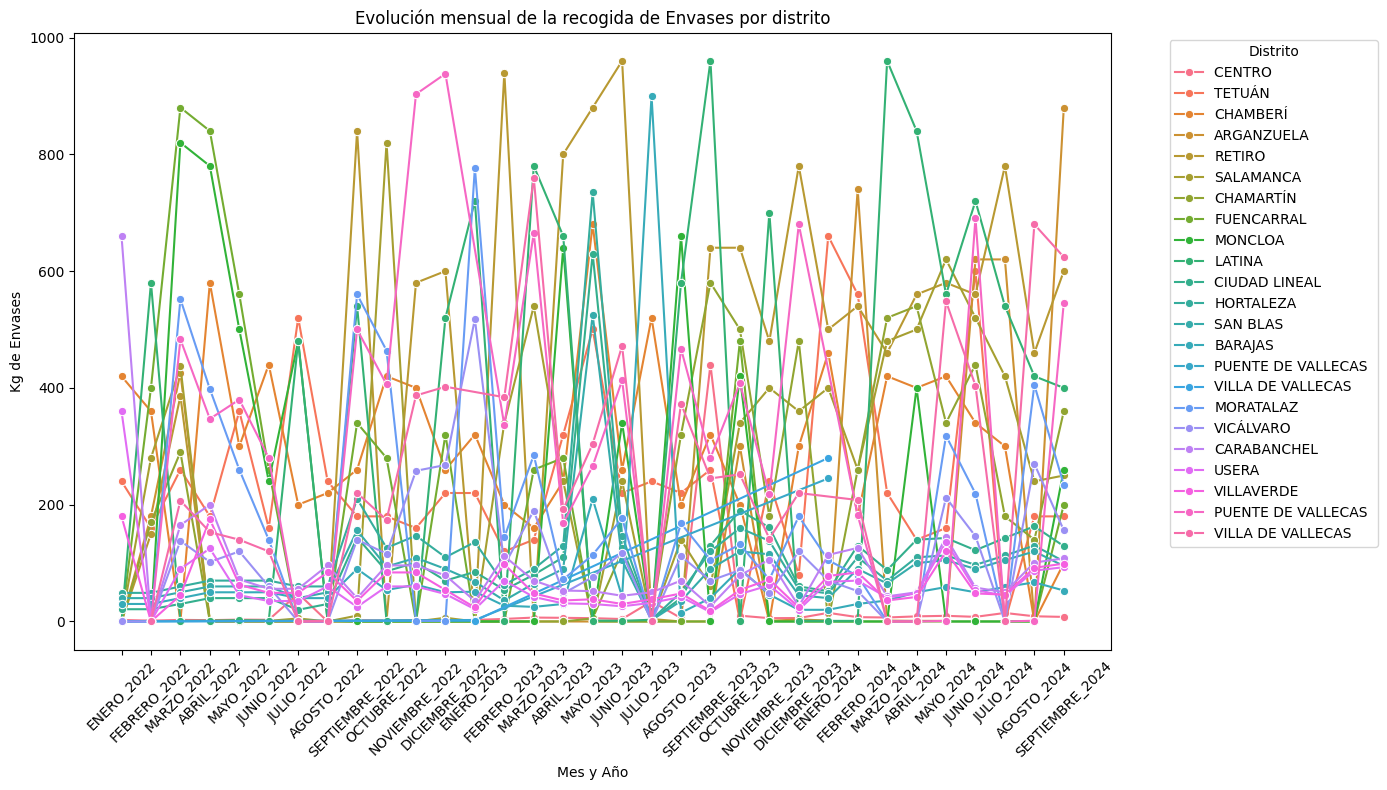

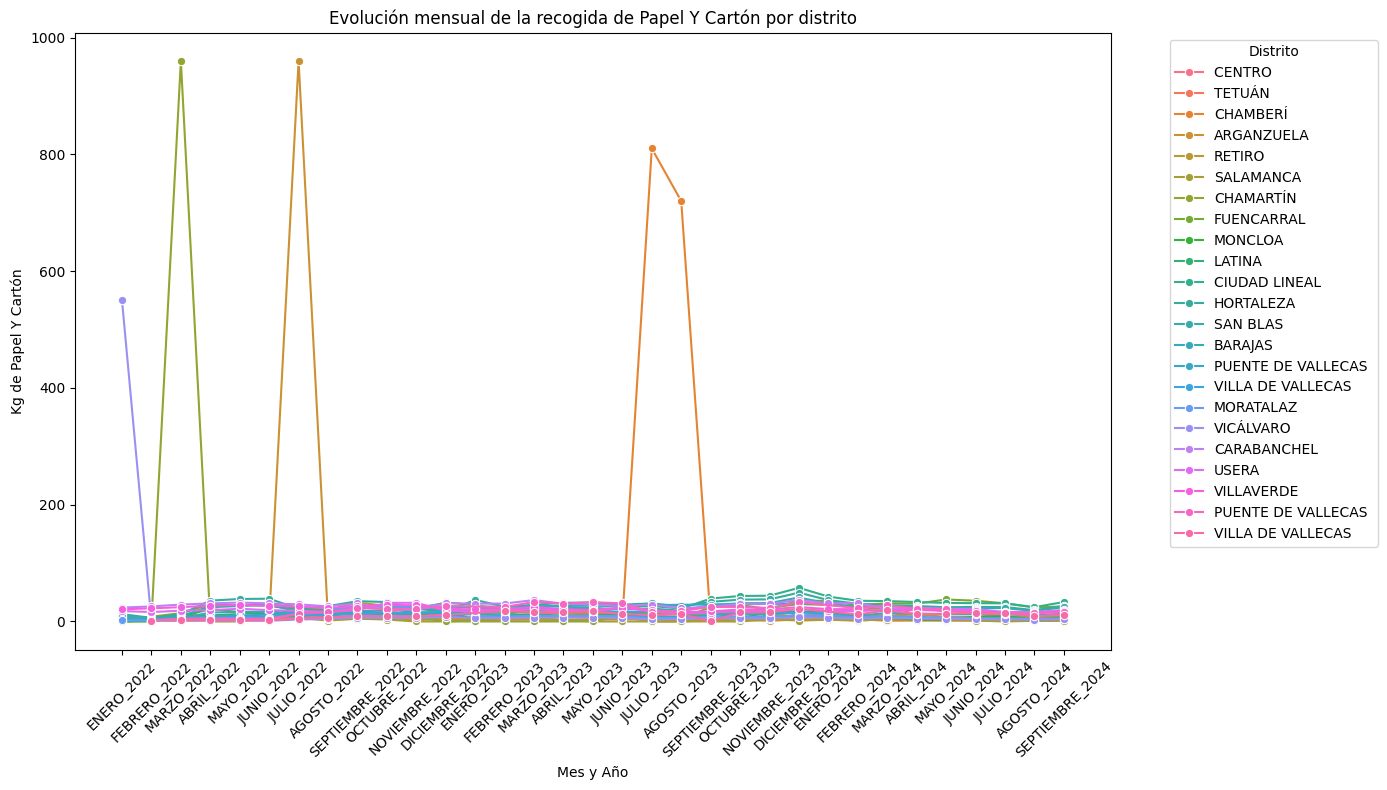

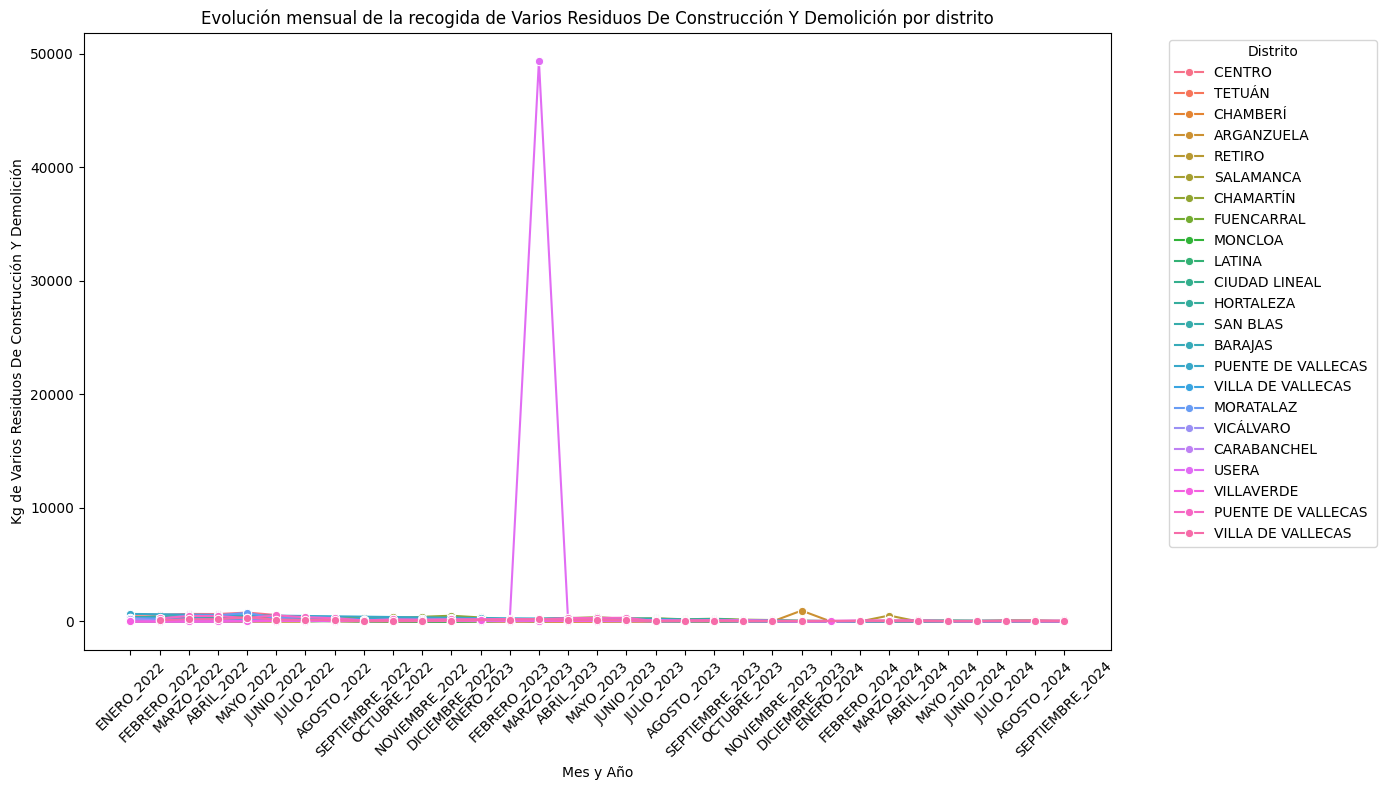

In [341]:
# Lista de residuos a analizar
residuos = ['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']

# Crear gráficos para cada tipo de residuo
for residuo in residuos:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_combined, x='mes_año', y=residuo, hue='distrito', marker='o')
    plt.title(f'Evolución mensual de la recogida de {residuo.replace("_", " ").title()} por distrito')
    plt.xlabel('Mes y Año')
    plt.ylabel(f'Kg de {residuo.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### **Centro:**
**Picos de residuos:**
- Diciembre-enero: Aumento significativo debido a las celebraciones navideñas y de Año Nuevo.
- Agosto: Disminución notable por el éxodo vacacional.

**Factores influyentes:**
- Alta concentración de comercios y restaurantes.
- Gran afluencia turística, especialmente en temporada alta.
- Celebración de eventos como la Cabalgata de Reyes y las Fiestas de San Isidro.

### **Salamanca y Chamartín:**
**Picos de residuos:**
- Incrementos en periodos de rebajas (enero y julio).
- Ligero aumento en septiembre-octubre por el regreso a la actividad tras el verano.

**Factores influyentes:**
- Alto nivel socioeconómico de los residentes.
- Presencia de zonas comerciales de lujo.
- Mayor generación de residuos de envases y embalajes.

### **Usera:**
**Picos de residuos:**
- Enero-febrero: Aumento significativo coincidiendo con el Año Nuevo Chino.

**Factores influyentes:**
- Alta concentración de población de origen chino.
- Celebraciones y eventos culturales específicos.
- Mayor generación de residuos de construcción y demolición por renovaciones urbanas.

### **Moncloa-Aravaca y Fuencarral-El Pardo:**
**Picos de residuos:**
- Incrementos graduales a lo largo del año debido al desarrollo del proyecto Madrid Nuevo Norte.

**Factores influyentes:**
- Grandes áreas verdes que generan residuos orgánicos (hojas y ramas).
- Presencia de universidades que influyen en la dinámica de generación de residuos.

### **Villa de Vallecas y Vicálvaro:**
**Picos de residuos:**
- Aumento progresivo a medida que avanza el proyecto Valdecarros.

**Factores influyentes:**
- Desarrollo urbanístico que genera residuos de construcción.
- Cambio en la demografía con la llegada de nuevos residentes.

### **Puente de Vallecas:**
**Picos de residuos:**
- Incrementos puntuales relacionados con el desarrollo del proyecto Los Berrocales.

**Factores influyentes:**
- Perfil socioeconómico que resulta en menor consumo y generación de residuos en general.
- Posibles deficiencias en la recogida de datos o en el sistema de recolección.

### **Carabanchel:**
**Picos de residuos:**
- Aumentos relacionados con el inicio del desarrollo urbano en los terrenos de la antigua cárcel.

**Factores influyentes:**
- Mezcla de zonas residenciales antiguas y nuevos desarrollos.
- Diversidad socioeconómica de la población.

### **Latina:**
**Picos de residuos:**
- Aumento en verano coincidiendo con el festival Veranos de la Villa.

**Factores influyentes:**
- Gran extensión del distrito con diversidad de tipologías urbanas.
- Mezcla de zonas residenciales y áreas verdes.

## **Conclusiones generales:**
- Los distritos céntricos y turísticos muestran patrones más marcados de estacionalidad en la generación de residuos.
- Los distritos con grandes proyectos de desarrollo urbano presentan incrementos graduales en la generación de residuos de construcción y demolición.
- Los factores socioculturales, como las celebraciones específicas de cada comunidad, tienen un impacto significativo en la generación de residuos en ciertos distritos.
- El nivel socioeconómico de los distritos influye en el tipo y cantidad de residuos generados, con zonas de mayor poder adquisitivo produciendo más residuos de envases y embalajes.
- La presencia de zonas verdes y parques influye en la generación de residuos orgánicos, especialmente en otoño.

### **2.5 Análisis de Outliers con BoxPlots:**

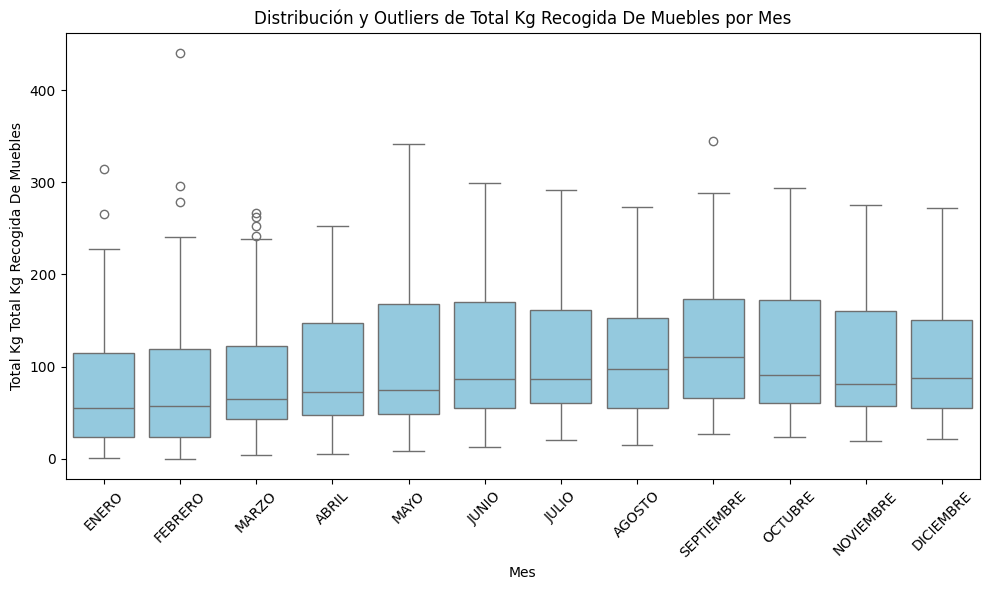

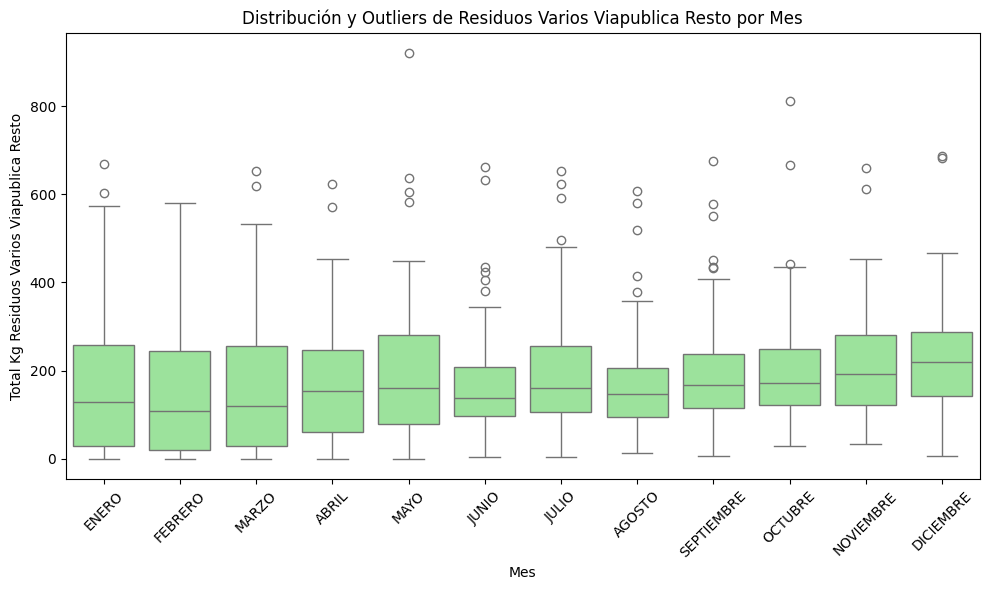

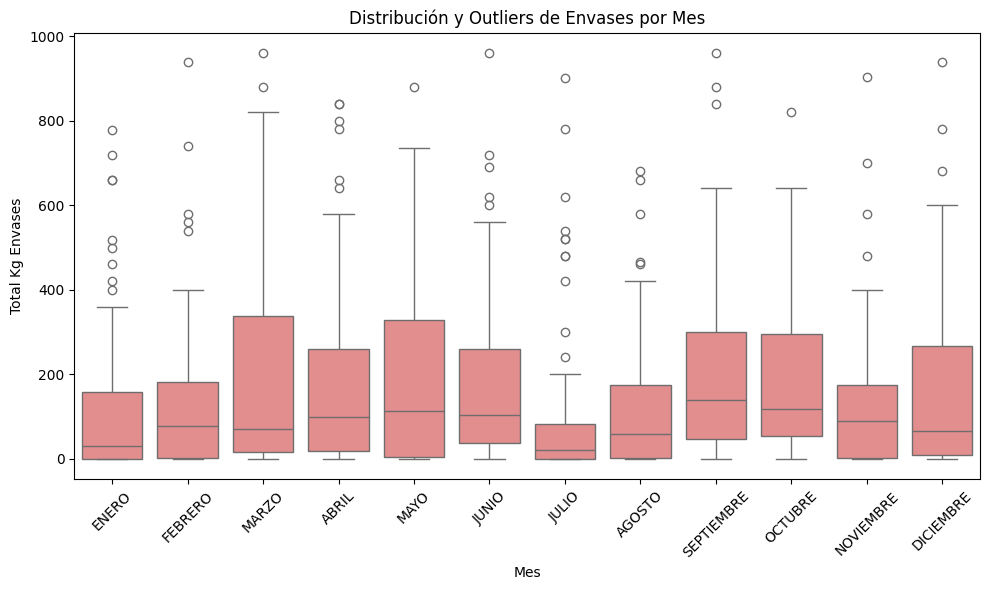

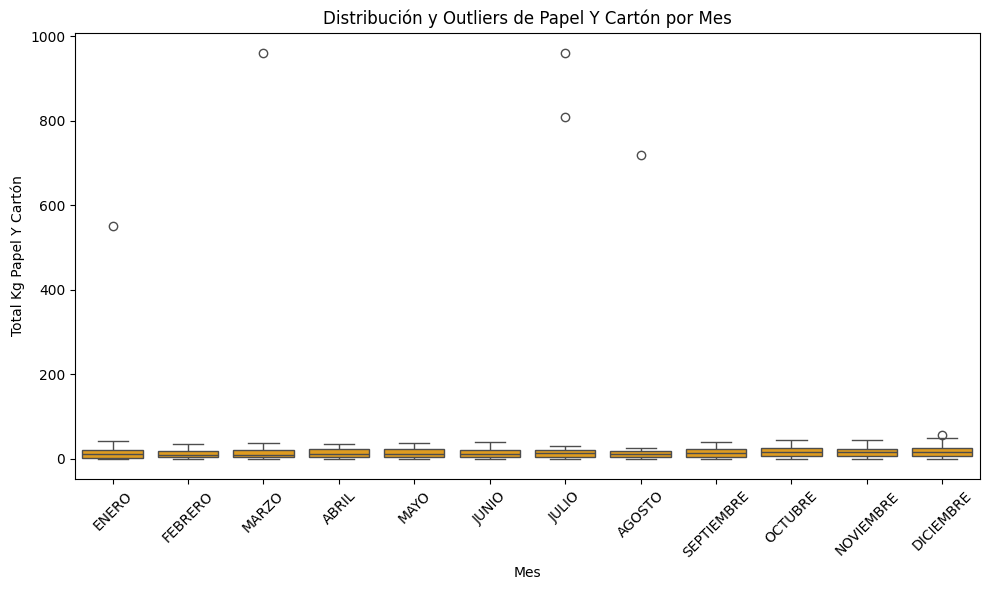

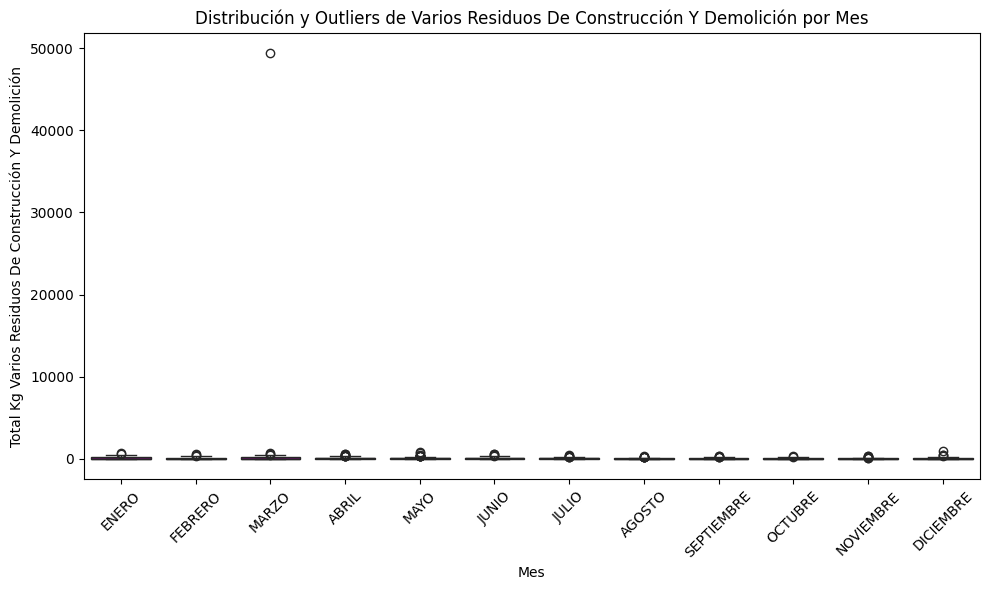

In [335]:
categorias = ['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']
colores = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple']

for categoria, color in zip(categorias, colores):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_combined, x='mes', y=categoria, color=color)
    plt.title(f'Distribución y Outliers de {categoria.replace("_", " ").title()} por Mes')
    plt.xlabel('Mes')
    plt.ylabel(f'Total Kg {categoria.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Observaciones por Tipo de Residuo:** 📊

1. **Papel y Cartón**
    - **Capacidad Base:** 20-30 kg (mediana estable)
    - **Gestión de Outliers:**
      - Capacidad extra del 300% para marzo y agosto (picos de 800-950 kg)
      - Sistema de compactación automática
      - Sensores de nivel con alertas tempranas

2. **Envases**
    - **Capacidad Base:** 100-150 kg (mediana)
    - **Gestión de Outliers:**
      - Mayor variabilidad (outliers frecuentes de 600-950 kg)
      - Capacidad extra del 200% en marzo-mayo
      - Compactadores más potentes
      - Sistema de alertas más frecuente

3. **Residuos Varios Vía Pública**
    - **Capacidad Base:** 150-200 kg (mediana)
    - **Gestión de Outliers:**
      - Picos de 600-900 kg
      - Incremento gradual hacia fin de año
      - Capacidad adaptativa por temporada

4. **Muebles**
    - **Capacidad Base:** 50-100 kg
    - **Gestión de Outliers:**
      - Picos de 300-450 kg
      - Mayor capacidad en verano
      - Zonas específicas para depósito

### **Recomendaciones Técnicas:** 📋

- **Sensores y Monitoreo**
  - Medición continua de nivel de llenado
  - Alertas automáticas al 75% de capacidad
  - Sistema predictivo basado en patrones estacionales
  - Monitoreo en tiempo real de peso y volumen

- **Capacidad Adaptativa**
  - Contenedores modulares que permitan ajuste de capacidad
  - Sistema de compactación inteligente
  - Redistribución automática de carga entre contenedores cercanos

- **Gestión Estacional**
  - Mayor capacidad en meses críticos (marzo, agosto)
  - Contenedores móviles adicionales en períodos de pico
  - Ajuste dinámico de rutas de recolección

- **Sistema de Alertas**
  - Tres niveles de alerta:
     - Preventiva (70% capacidad)
     - Urgente (85% capacidad)
     - Crítica (95% capacidad)
  - Notificaciones automáticas al centro de control
  - Activación de protocolos de emergencia para outliers

### **Conclusiones:**

Los datos muestran patrones claros de estacionalidad y outliers significativos que deben considerarse en el diseño e implementación de los Smart Bins. La capacidad debe planificarse considerando no solo la mediana de residuos sino también los picos extremos, con sistemas flexibles que puedan adaptarse a las variaciones observadas.

Basado en el análisis de los gráficos de distribución y outliers, podemos recomendar la siguiente implementación de SmartWaste en Madrid:

#### **Distritos Prioritarios:**

**Distritos con Alta Generación de Residuos:**
- **Centro y Salamanca:** Presentan picos consistentes de papel/cartón.
- **Puente de Vallecas y Villa de Vallecas:** Altos volúmenes de envases.
- **Ciudad Lineal:** Concentración significativa de residuos varios.

#### **Implementación por Tipo de Residuo:**

**Papel y Cartón**
- Contenedores inteligentes con capacidad base de 20kg.
- Sistema de compactación automática para gestionar picos de hasta 950kg.
- Prioridad en zonas comerciales y de oficinas.

**Envases**
- Contenedores con capacidad flexible (100-150kg).
- Sistema de alertas tempranas para picos de 600-950kg.
- Mayor densidad de contenedores en marzo-mayo.

**Residuos Varios**
- Capacidad base de 200kg.
- Sistema adaptativo para gestionar variaciones estacionales.
- Refuerzo en últimos meses del año.

#### **Características de Implementación:**

**Sistema de Monitorización:**
- Sensores de nivel en tiempo real.
- Alertas automáticas al 75% de capacidad.
- Predicción de patrones estacionales.

**Gestión Adaptativa:**
- Ajuste dinámico de rutas de recolección.
- Redistribución de recursos según demanda.
- Capacidad de respuesta a eventos especiales.

**Tecnología Smart:**
- IoT para monitoreo continuo.
- Algoritmos predictivos para anticipar picos.
- Sistema de optimización de rutas en tiempo real.

Esta implementación permitirá una gestión más eficiente de los residuos, adaptándose a las necesidades específicas de cada distrito y tipo de residuo.

In [357]:
# Function to load JSON data and create DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r', encoding='utf-8') as archivo:
        datos = json.load(archivo)
    # Adjust the key based on the actual structure of the JSON files
    if 'features' in datos:
        features = datos['features']
        atributos = [item['attributes'] for item in features]
    else:
        atributos = datos  # Assuming the JSON is a list of dictionaries
    return pd.DataFrame(atributos)

# File paths
file_paths = [
   
    'DATA/Contenedores_envases.json',
    'DATA/Contenedores_organica_Madrid.json',
    'DATA/Contenedores_papel_carton.json',
    'DATA/Contenedores_resto_Madrid.json',
    'DATA/Contenedores_ropa_autorizados_del_Ayuntamiento_de_Madrid_vista.json',
    'DATA/Contenedores_vidrio_Madrid.json'
]

# Create DataFrames for each file
dfs = {file_path.split('/')[-1].replace('.json', ''): load_json_to_df(file_path) for file_path in file_paths}

# Display the first 5 and last 5 rows of each DataFrame and the number of rows
for name, df in dfs.items():
    print(f"DataFrame for {name}:")
    display(df.head())
    display(df.tail())
    print(f"Number of rows: {df.shape[0]}\n")

    # Importar cada archivo de contenedor a un DataFrame específico
    df_contenedores_envases = dfs['Contenedores_envases']
    df_contenedores_organica = dfs['Contenedores_organica_Madrid']
    df_contenedores_papel_carton = dfs['Contenedores_papel_carton']
    df_contenedores_resto = dfs['Contenedores_resto_Madrid']
    df_contenedores_ropa = dfs['Contenedores_ropa_autorizados_del_Ayuntamiento_de_Madrid_vista']
    df_contenedores_vidrio = dfs['Contenedores_vidrio_Madrid']


DataFrame for Contenedores_envases:


OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
0         6                      None         ENVASES  E0800CT   
1         9                      None         ENVASES  E0800CT   
2        12                      None         ENVASES  E0800CT   
3        19                      None         ENVASES  E0800CT   
4        20                      None         ENVASES  E0800CT   

  Descripcion_Modelo Cantidad  Lote   Distrito         Barrio Tipo_Via Nombre  \
0               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
1               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
2               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
3               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
4               None     None     2  HORTALEZA  PINAR DEL REY     None   None   

  Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
0   None   444913.3554   4481010.887 -364989885  40.477958      None  
1   None   444698.9997   4480417.077 -365237584  40.472595      None  
2   None   444706.8168   4480331.545 -365227617  40.471825      None  
3   None   445437.0476   4480546.963 -364368092  40.473813      None  
4   None   445436.9891   4480546.945 -364368161  40.473813      None

OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
1995      2108                      None         ENVASES  E0800CT   
1996      2109                      None         ENVASES  E0800CT   
1997      2110                      None         ENVASES  E0800CT   
1998      2111                      None         ENVASES  E0800CT   
1999      2112                      None         ENVASES  E0800CT   

     Descripcion_Modelo Cantidad  Lote             Distrito      Barrio  \
1995               None     None     1  FUENCARRAL-EL PARDO  PEÑAGRANDE   
1996               None     None     1  FUENCARRAL-EL PARDO  PEÑAGRANDE   
1997               None     None     1  FUENCARRAL-EL PARDO  PEÑAGRANDE   
1998               None     None     1  FUENCARRAL-EL PARDO  PEÑAGRANDE   
1999               None     None     1  FUENCARRAL-EL PARDO  PEÑAGRANDE   

     Tipo_Via Nombre Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud  \
1995     None   None   None     438899.59    4481544.22 -372089412  40.482342   
1996     None   None   None     438895.17    4481658.46 -372095728  40.483371   
1997     None   None   None     438899.59    4481544.22 -372089412  40.482342   
1998     None   None   None     438895.17    4481658.46 -372095728  40.483371   
1999     None   None   None     438419.45    4481497.42 -372655409  40.481885   

     Direccion  
1995      None  
1996      None  
1997      None  
1998      None  
1999      None

Number of rows: 2000

DataFrame for Contenedores_organica_Madrid:


OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
0         1                      None        ORGANICA  O0800CT   
1         7                      None        ORGANICA  O0800CT   
2         8                      None        ORGANICA  O0800CT   
3        11                      None        ORGANICA  O0800CT   
4        14                      None        ORGANICA  O0800CT   

  Descripcion_Modelo Cantidad  Lote   Distrito         Barrio Tipo_Via Nombre  \
0               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
1               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
2               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
3               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
4               None     None     2  HORTALEZA  PINAR DEL REY     None   None   

  Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
0   None   445712.5355   4480506.666 -364042772  40.473468      None  
1   None   444913.3554   4481010.887 -364989885  40.477958      None  
2   None   444913.3554   4481010.887 -364989885  40.477958      None  
3   None   444692.8579   4480505.005 -365245595  40.473386      None  
4   None   444726.0000   4480355.000 -365205193  40.472037      None

OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
1995     18580                      None        ORGANICA  O0800CT   
1996     18581                      None        ORGANICA  O0800CT   
1997     18582                      None        ORGANICA  O0800CT   
1998     18583                      None        ORGANICA  O0800CT   
1999     18584                      None        ORGANICA  O0800CT   

     Descripcion_Modelo Cantidad  Lote Distrito            Barrio Tipo_Via  \
1995               None     None     1   LATINA  PUERTA DEL ANGEL     None   
1996               None     None     1   LATINA        CAMPAMENTO     None   
1997               None     None     1   LATINA            LUCERO     None   
1998               None     None     1   LATINA        CAMPAMENTO     None   
1999               None     None     1   LATINA           AGUILAS     None   

     Nombre Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
1995   None   None   437534.7507   4472943.104 -373615017  40.404758      None  
1996   None   None   434812.5900   4472124.750 -376814424  40.397178      None  
1997   None   None   436011.5100   4473069.210 -375411272  40.405779      None  
1998   None   None   434969.0000   4472303.900 -376631961  40.398804      None  
1999   None   None   433970.8300   4469961.100 -377783810  40.377620      None

Number of rows: 2000

DataFrame for Contenedores_papel_carton:


COD_TIPO_DATO           TIPO_DATO IDENTIFICADOR_MINT COD_NDP  \
0          None  Punto Limpio Móvil               None    None   
1          None  Punto Limpio Móvil               None    None   
2          None  Punto Limpio Móvil               None    None   
3          None  Punto Limpio Móvil               None    None   
4          None  Punto Limpio Móvil               None    None   

                                  DIRECCION_COMPLETA  \
0                                 Calle Arrieta, 15    
1                                Calle Barquillo, 4    
2                                 Plaza Cebada, 5-7    
3                             Calle Conde Duque, 30    
4  Glorieta Embajadores, 10 esquina calle Embajad...   

          DIRECCION_AUXILIAR COD_VIAL CLASE_VIAL PARTICULAS_VIAL  NOMBRE_VIAL  \
0                                None      Calle            None      Arrieta   
1                                None      Calle            None    Barquillo   
2                                None      Plaza            None       Cebada   
3                                None      Calle            None  Conde Duque   
4  esquina calle Embajadores     None   Glorieta            None  Embajadores   

   ...  LONGITUD DÍA_SEMANA   TURNO    HORA_INICIO     HORA_FINAL  \
0  ... -3.711070     Martes  Mañana  1716287400000  1716292800000   
1  ... -3.695530     Sabado  Mañana  1716274800000  1716280200000   
2  ... -3.709270     Sabado   Tarde  1716300000000  1716305400000   
3  ... -3.710134     Martes  Mañana  1716274800000  1716280200000   
4  ... -3.702860     Sabado   Tarde  1716312600000  1716318000000   

    CreationDate      Creator       EditDate       Editor  ObjectId  
0  1716314723788  Esri_Madrid  1716314723788  Esri_Madrid         1  
1  1716314723788  Esri_Madrid  1716314723788  Esri_Madrid         2  
2  1716314723788  Esri_Madrid  1716314723788  Esri_Madrid         3  
3  1716314723788  Esri_Madrid  1716314723788  Esri_Madrid         4  
4  1716314723788  Esri_Madrid  1716314723788  Esri_Madrid         5  

[5 rows x 29 columns]

COD_TIPO_DATO           TIPO_DATO IDENTIFICADOR_MINT COD_NDP  \
346          None  Punto Limpio Móvil               None    None   
347          None  Punto Limpio Móvil               None    None   
348          None  Punto Limpio Móvil               None    None   
349          None  Punto Limpio Móvil               None    None   
350          None  Punto Limpio Móvil               None    None   

                                    DIRECCION_COMPLETA  \
346                                    Plaza Navío, 1    
347                          Calle Playa de Zarauz, 1    
348                            Calle Pradoluengo, 243    
349  calle Ribera del Sena, 21 esquina con Estrasbu...   
350                                   Calle Rioja, 27    

                                    DIRECCION_AUXILIAR COD_VIAL CLASE_VIAL  \
346                                                        None      Plaza   
347                                                        None      Calle   
348                                                        None      Calle   
349  esquina con Estrasburgo Edificio Ayuntamiento ...     None      calle   
350                                                        None      Calle   

    PARTICULAS_VIAL      NOMBRE_VIAL  ...  LONGITUD DÍA_SEMANA   TURNO  \
346            None            Navío  ... -3.588317     Martes  Mañana   
347            None  Playa de Zarauz  ... -3.592435     Jueves   Tarde   
348            None      Pradoluengo  ... -3.582006     Martes  Mañana   
349            None  Ribera del Sena  ... -3.617672     Jueves   Tarde   
350            None            Rioja  ... -3.585311     Martes  Mañana   

       HORA_INICIO     HORA_FINAL   CreationDate      Creator       EditDate  \
346  1716281100000  1716286500000  1716314723788  Esri_Madrid  1716314723788   
347  1716306300000  1716311700000  1716314723788  Esri_Madrid  1716314723788   
348  1716274800000  1716280200000  1716314723788  Esri_Madrid  1716314723788   
349  1716300000000  1716305400000  1716314723788  Esri_Madrid  1716314723788   
350  1716287400000  1716292800000  1716314723788  Esri_Madrid  1716314723788   

          Editor  ObjectId  
346  Esri_Madrid       347  
347  Esri_Madrid       348  
348  Esri_Madrid       349  
349  Esri_Madrid       350  
350  Esri_Madrid       351  

[5 rows x 29 columns]

Number of rows: 351

DataFrame for Contenedores_resto_Madrid:


OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
0         2                      None           RESTO  R0800CT   
1         3                      None           RESTO  R0800CT   
2         4                      None           RESTO  R0800CT   
3         5                      None           RESTO  R0800CT   
4        10                      None           RESTO  R0800CT   

  Descripcion_Modelo Cantidad  Lote   Distrito         Barrio Tipo_Via Nombre  \
0               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
1               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
2               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
3               None     None     2  HORTALEZA  PINAR DEL REY     None   None   
4               None     None     2  HORTALEZA  PINAR DEL REY     None   None   

  Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
0   None   445183.6872   4481147.125 -364672152  40.479203      None  
1   None   445183.7882   4481147.446 -364672035  40.479206      None  
2   None   445207.0000   4481124.000 -364644449  40.478996      None  
3   None   444913.3554   4481010.887 -364989885  40.477958      None  
4   None   444743.0000   4480206.000 -365183842  40.470696      None

OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
1995      7567                      None           RESTO  R0800CT   
1996      7568                      None           RESTO  R0800CT   
1997      7569                      None           RESTO  R0800CT   
1998      7570                      None           RESTO  R0800CT   
1999      7571                      None           RESTO  R0800CT   

     Descripcion_Modelo Cantidad  Lote Distrito            Barrio Tipo_Via  \
1995               None     None     1   LATINA            LUCERO     None   
1996               None     None     1   LATINA  PUERTA DEL ANGEL     None   
1997               None     None     1   LATINA            LUCERO     None   
1998               None     None     1   LATINA            LUCERO     None   
1999               None     None     1   LATINA        CAMPAMENTO     None   

     Nombre Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
1995   None   None     435749.88    4472949.26 -375718370  40.404678      None  
1996   None   None     437832.59    4473288.88 -373267420  40.407895      None  
1997   None   None     435927.48    4473039.71 -375509997  40.405506      None  
1998   None   None     435927.48    4473039.71 -375509997  40.405506      None  
1999   None   None     433901.22    4471885.29 -377885769  40.394949      None

Number of rows: 2000

DataFrame for Contenedores_ropa_autorizados_del_Ayuntamiento_de_Madrid_vista:


TIPO_DATO IDENTIFICADOR_MINT COD_ELEMENTO COD_NDP  \
0  Contenedor de Ropa               None         None    None   
1  Contenedor de Ropa               None         None    None   
2  Contenedor de Ropa               None         None    None   
3  Contenedor de Ropa               None         None    None   
4  Contenedor de Ropa               None         None    None   

                            DIRECCION_COMPLETA DIRECCION_AUXILIAR CENTRO  \
0                       CALLE DE LEGANITOS, 47                             
1  AVENIDA DE LA GRAN VIA DE SAN FRANCISCO, 21                             
2                          RONDA DE SEGOVIA, 2                             
3                     PLAZA DE GABRIEL MIRO, 5                             
4                            CALLE DE SILVA, 2                             

  COD_VIAL CLASE_VIAL PARTICULAS_VIAL  ...  UTMY    LATITUD  LONGITUD HORARIO  \
0     None       None            None  ...  None  40.422991 -3.711037    None   
1     None       None            None  ...  None  40.409966 -3.713901    None   
2     None       None            None  ...  None  40.411368 -3.718317    None   
3     None       None            None  ...  None  40.412085 -3.714769    None   
4     None       None            None  ...  None  40.420561 -3.708119    None   

  OBSERVACIONES   CreationDate      Creator       EditDate       Editor  \
0          None  1716314510365  Esri_Madrid  1716314510365  Esri_Madrid   
1          None  1716314510365  Esri_Madrid  1716314510365  Esri_Madrid   
2          None  1716314510365  Esri_Madrid  1716314510365  Esri_Madrid   
3          None  1716314510365  Esri_Madrid  1716314510365  Esri_Madrid   
4          None  1716314510365  Esri_Madrid  1716314510365  Esri_Madrid   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 27 columns]

TIPO_DATO IDENTIFICADOR_MINT COD_ELEMENTO COD_NDP  \
995  Contenedor de ropa               None         None    None   
996  Contenedor de ropa               None         None    None   
997  Contenedor de ropa               None         None    None   
998  Contenedor de ropa               None         None    None   
999  Contenedor de ropa               None         None    None   

              DIRECCION_COMPLETA DIRECCION_AUXILIAR  \
995        CALLE DE CHAPARRAL, 7                      
996    CALLE DE CHIQUINQUIRA, 12                      
997         CALLE DEL IMPALA, 11                      
998    CALLE DEL MAR DE CORAL, 6                      
999  CALLE DE SANTA VIRGILIA, 13                      

                           CENTRO COD_VIAL CLASE_VIAL PARTICULAS_VIAL  ...  \
995                                   None       None            None  ...   
996                  C.C Colombia     None       None            None  ...   
997                                   None       None            None  ...   
998                     Plaza Día     None       None            None  ...   
999  Centro Cultural de Hortaleza     None       None            None  ...   

     UTMY    LATITUD  LONGITUD HORARIO OBSERVACIONES   CreationDate  \
995  None  40.470840 -3.636280    None          None  1716314510365   
996  None  40.471716 -3.637385    None          None  1716314510365   
997  None  40.473244 -3.636775    None          None  1716314510365   
998  None  40.475344 -3.640167    None          None  1716314510365   
999  None  40.477527 -3.642046    None          None  1716314510365   

         Creator       EditDate       Editor  ObjectId  
995  Esri_Madrid  1716314510365  Esri_Madrid       996  
996  Esri_Madrid  1716314510365  Esri_Madrid       997  
997  Esri_Madrid  1716314510365  Esri_Madrid       998  
998  Esri_Madrid  1716314510365  Esri_Madrid       999  
999  Esri_Madrid  1716314510365  Esri_Madrid      1000  

[5 rows x 27 columns]

Number of rows: 1000

DataFrame for Contenedores_vidrio_Madrid:


OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
0       849                      None          VIDRIO  V2200CL   
1       850                      None          VIDRIO  V2200CL   
2       851                      None          VIDRIO  V2200CL   
3       852                      None          VIDRIO  V2200CL   
4       853                      None          VIDRIO  V2200CL   

  Descripcion_Modelo Cantidad  Lote Distrito            Barrio Tipo_Via  \
0               None     None     1   LATINA  PUERTA DEL ANGEL     None   
1               None     None     1   LATINA  PUERTA DEL ANGEL     None   
2               None     None     1   LATINA  PUERTA DEL ANGEL     None   
3               None     None     1   LATINA  PUERTA DEL ANGEL     None   
4               None     None     1   LATINA  PUERTA DEL ANGEL     None   

  Nombre Numero  Coordenada_X  Coordenada_Y   Longitud    Latitud Direccion  
0   None   None     437215.59    4473269.22 -373994334  40.407672      None  
1   None   None     437022.16    4472933.89 -374218964  40.404637      None  
2   None   None     437502.89    4473034.38 -373653458  40.405578      None  
3   None   None     437502.89    4473034.38 -373653458  40.405578      None  
4   None   None     437626.46    4473776.13 -373515112  40.412269      None

OBJECTID Codigo_Interno_del_Situad Tipo_Contenedor   Modelo  \
1995     26020                      None          VIDRIO  V2200CL   
1996     26023                      None          VIDRIO  V2200CL   
1997     26024                      None          VIDRIO  V2200CL   
1998     26026                      None          VIDRIO  V2200CL   
1999     26028                      None          VIDRIO  V2200CL   

     Descripcion_Modelo Cantidad  Lote           Distrito  \
1995               None     None     1  MONCLOA - ARAVACA   
1996               None     None     1  MONCLOA - ARAVACA   
1997               None     None     1  MONCLOA - ARAVACA   
1998               None     None     1  MONCLOA - ARAVACA   
1999               None     None     1  MONCLOA - ARAVACA   

                    Barrio Tipo_Via Nombre Numero  Coordenada_X  Coordenada_Y  \
1995               ARAVACA     None   None   None     432530.85    4479226.97   
1996  CIUDAD UNIVERSITARIA     None   None   None     437670.21    4476512.70   
1997            VALDEMARIN     None   None   None     433594.35    4479739.56   
1998            VALDEMARIN     None   None   None     433594.35    4479739.56   
1999         CASA DE CAMPO     None   None   None     438322.17    4475108.13   

       Longitud    Latitud Direccion  
1995 -379578278  40.460975      None  
1996 -373490377  40.436925      None  
1997 -378329381  40.465678      None  
1998 -378329381  40.465678      None  
1999 -372708109  40.424320      None

Number of rows: 2000



### **3. Análisis Geográfico**

In [358]:
import folium
from folium.plugins import HeatMap

# Convertir ambas columnas a tipo float
df_contenedores_envases['Longitud'] = df_contenedores_envases['Longitud'].astype(float)
df_contenedores_envases['Latitud'] = df_contenedores_envases['Latitud'].astype(float)

# Aplicar la función lambda para agregar un punto decimal
df_contenedores_envases['Longitud'] = df_contenedores_envases['Longitud'].apply(lambda x: x / 100000000)
# Imprimir DataFrame con las coordenadas
print(df_contenedores_envases[['Latitud', 'Longitud']].head())
# Aplicar los colores al mapa de calor
for categoria, color in colors.items():
    if categoria in df_contenedores_envases.columns:
        heat_data = df_contenedores_envases[['Latitud', 'Longitud']].dropna().values.tolist()
        HeatMap(heat_data, gradient={0.4: pink, 0.65: lightcoral, 1: coral}).add_to(madrid_map_envases)

# Crear una lista de coordenadas para el mapa de calor
heat_data_envases = df_contenedores_envases[['Latitud', 'Longitud']].dropna().values.tolist()

# Crear el mapa centrado en Madrid
madrid_map_envases = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Añadir el mapa de calor
HeatMap(heat_data_envases).add_to(madrid_map_envases)

# Mostrar el mapa
madrid_map_envases

     Latitud  Longitud
0  40.477958 -3.649899
1  40.472595 -3.652376
2  40.471825 -3.652276
3  40.473813 -3.643681
4  40.473813 -3.643682


In [266]:
# Crear el mapa centrado en Madrid
madrid_map_envases = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Añadir los puntos de los contenedores de envases
for index, row in df_contenedores_envases.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"Contenedor de Envases: {row['Nombre']}",
        icon=folium.Icon(color='yellow', icon='trash', prefix='fa')
    ).add_to(madrid_map_envases)

# Mostrar el mapa
madrid_map_envases

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_4960/795856997.py:11: UserWarning:

color argument of Icon should be one of: {'beige', 'pink', 'darkblue', 'darkgreen', 'gray', 'lightblue', 'darkpurple', 'darkred', 'green', 'lightgreen', 'blue', 'white', 'red', 'orange', 'purple', 'lightgray', 'lightred', 'black', 'cadetblue'}.



In [26]:
# Crear diccionario con los datos de población y densidad
datos_distritos = {
    'distrito': [
        'CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 
        'CHAMBERÍ', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA', 'LATINA', 
        'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS', 'MORATALAZ', 'CIUDAD LINEAL',
        'HORTALEZA', 'VILLAVERDE', 'VILLA DE VALLECAS', 'VICÁLVARO', 
        'SAN BLAS-CANILLEJAS', 'BARAJAS'
    ],
    'poblacion': [
        139687, 153304, 117918, 145702, 144796, 160002, 138204, 248443, 
        121757, 241672, 262339, 142746, 241603, 92814, 220345, 198391, 
        159038, 117501, 83804, 161219, 48646
    ],
    'superficie_ha': [
        522.82, 646.22, 546.62, 539.24, 917.55, 537.47, 467.92, 23783.84,
        4653.11, 2542.72, 1404.83, 777.77, 1496.86, 610.32, 1142.57, 2741.98,
        2018.76, 5146.72, 3526.67, 2229.24, 4192.28
    ]
}


# Crear DataFrame
df_distritos = pd.DataFrame(datos_distritos)

# Calcular densidad (habitantes/hectárea)
df_distritos['densidad'] = df_distritos['poblacion'] / df_distritos['superficie_ha']

# Guardar como CSV
df_distritos.to_csv('densidad_poblacion_distritos_madrid.csv', index=False)

# Imprimir el DataFrame
print(df_distritos)

# Crear un DataFrame con la suma de kilogramos de cada tipo de residuo por distrito
df_residuos_por_distrito = df_combined.groupby('distrito')[['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'orgánica_hojas_y_ramas','varios_residuos_de_construcción_y_demolición']].sum().reset_index()

# Imprimir el DataFrame
print(df_residuos_por_distrito)

# Combinar ambos DataFrames en uno solo
df_combined_distritos = pd.merge(df_distritos, df_residuos_por_distrito, on='distrito')

# Mostrar el DataFrame combinado
display(df_combined_distritos)

               distrito  poblacion  superficie_ha    densidad
0                CENTRO     139687         522.82  267.179909
1            ARGANZUELA     153304         646.22  237.231902
2                RETIRO     117918         546.62  215.722074
3             SALAMANCA     145702         539.24  270.198798
4             CHAMARTÍN     144796         917.55  157.807204
5                TETUÁN     160002         537.47  297.694755
6              CHAMBERÍ     138204         467.92  295.358181
7   FUENCARRAL-EL PARDO     248443       23783.84   10.445874
8       MONCLOA-ARAVACA     121757        4653.11   26.166800
9                LATINA     241672        2542.72   95.044677
10          CARABANCHEL     262339        1404.83  186.740744
11                USERA     142746         777.77  183.532407
12   PUENTE DE VALLECAS     241603        1496.86  161.406544
13            MORATALAZ      92814         610.32  152.074322
14        CIUDAD LINEAL     220345        1142.57  192.850329
15      

distrito  poblacion  superficie_ha    densidad  \
0           ARGANZUELA     153304         646.22  237.231902   
1               RETIRO     117918         546.62  215.722074   
2            SALAMANCA     145702         539.24  270.198798   
3            CHAMARTÍN     144796         917.55  157.807204   
4               TETUÁN     160002         537.47  297.694755   
5             CHAMBERÍ     138204         467.92  295.358181   
6               LATINA     241672        2542.72   95.044677   
7          CARABANCHEL     262339        1404.83  186.740744   
8                USERA     142746         777.77  183.532407   
9   PUENTE DE VALLECAS     241603        1496.86  161.406544   
10           MORATALAZ      92814         610.32  152.074322   
11       CIUDAD LINEAL     220345        1142.57  192.850329   
12           HORTALEZA     198391        2741.98   72.353190   
13          VILLAVERDE     159038        2018.76   78.780043   
14   VILLA DE VALLECAS     117501        5146.72   22.830269   
15           VICÁLVARO      83804        3526.67   23.762927   
16             BARAJAS      48646        4192.28   11.603710   

    total_kg_recogida_de_muebles  residuos_varios_viapublica_resto    envases  \
0                       1798.027                          7797.760   3777.080   
1                       1557.562                          6858.844  13724.200   
2                       1097.120                         10472.880   7914.060   
3                       1429.093                          5822.722   5432.440   
4                       3082.640                         10550.536   8121.380   
5                       1730.740                          8607.180   9880.000   
6                       6690.510                          4184.800  10978.280   
7                       7611.466                          7219.529   3133.000   
8                       5352.720                          4667.200   2022.000   
9                        425.155                           507.452    247.563   
10                      2496.108                          2673.035   5961.104   
11                      4360.821                          5536.668   3421.700   
12                      4622.666                          5627.993   3802.150   
13                      6025.604                          5678.257   2075.000   
14                       202.207                           162.088    281.322   
15                      1303.770                          1474.605   3592.000   
16                      1882.475                          2268.551   2507.000   

    papel_y_cartón  orgánica_hojas_y_ramas  \
0         1058.242                 512.680   
1          354.602                 169.409   
2           73.630                 357.770   
3         1310.353                 600.310   
4          148.837                 321.880   
5         1655.080                 472.440   
6          288.910                1379.980   
7          892.046                2320.484   
8          632.159                1432.206   
9           58.474                  95.684   
10         324.330                1065.924   
11         893.542                1358.042   
12         939.567                2929.389   
13         716.196                1951.688   
14          34.431                  35.205   
15         700.282                2498.205   
16         379.836                3060.355   

    varios_residuos_de_construcción_y_demolición  
0                                       2302.170  
1                                       1102.330  
2                                       3716.479  
3                                       5388.040  
4                                       2442.880  
5                                       2315.200  
6                                       2416.111  
7                                       2117.644  
8                                      50679.805  
9                                       1015.898  
10          

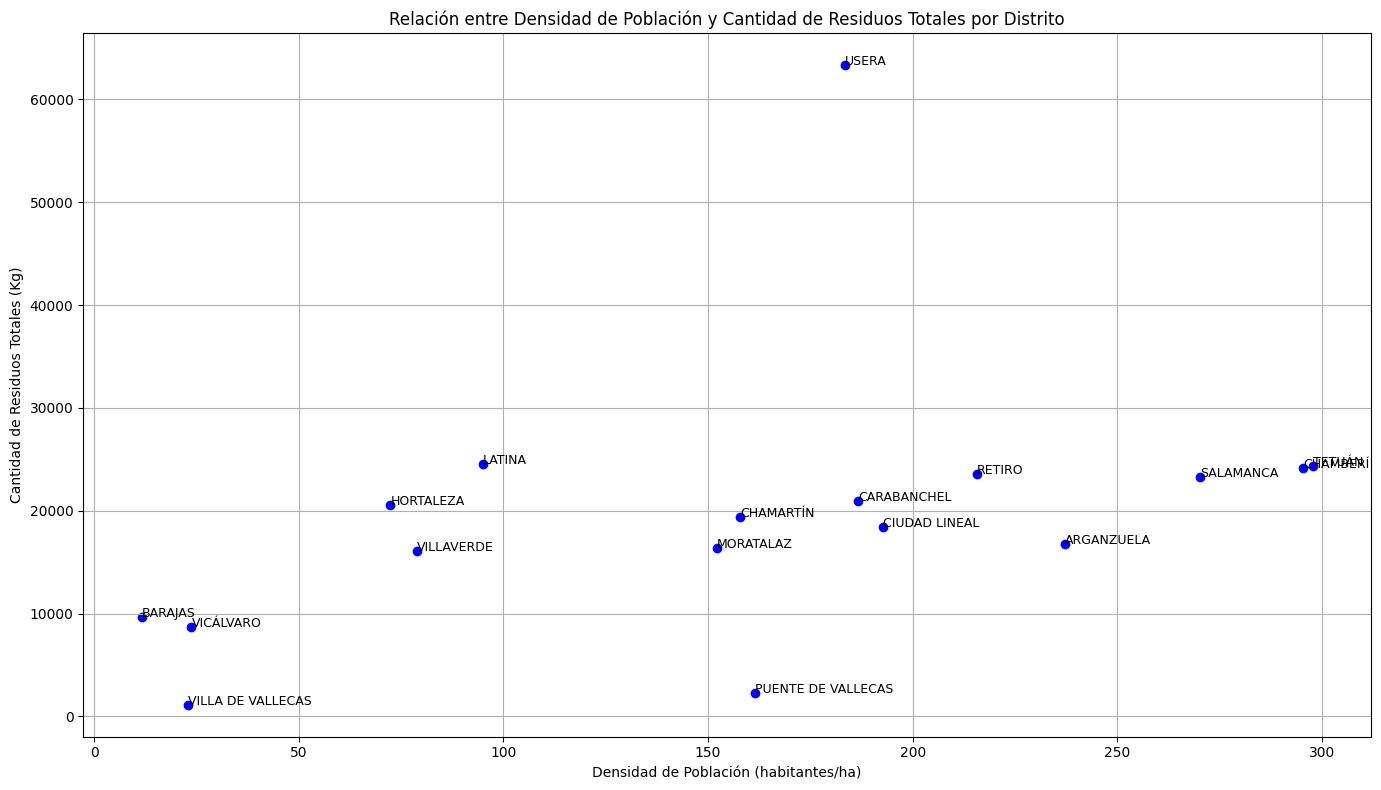

In [25]:
import matplotlib.pyplot as plt

# Calcular la cantidad total de residuos por distrito
df_combined_distritos['total_residuos'] = df_combined_distritos[['total_kg_recogida_de_muebles', 'residuos_varios_viapublica_resto', 'envases', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']].sum(axis=1)

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 8))
plt.scatter(df_combined_distritos['densidad'], df_combined_distritos['total_residuos'], color='blue')

# Añadir etiquetas de distrito
for i, row in df_combined_distritos.iterrows():
    plt.text(row['densidad'], row['total_residuos'], row['distrito'], fontsize=9)

# Añadir título y etiquetas
plt.title('Relación entre Densidad de Población y Cantidad de Residuos Totales por Distrito')
plt.xlabel('Densidad de Población (habitantes/ha)')
plt.ylabel('Cantidad de Residuos Totales (Kg)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

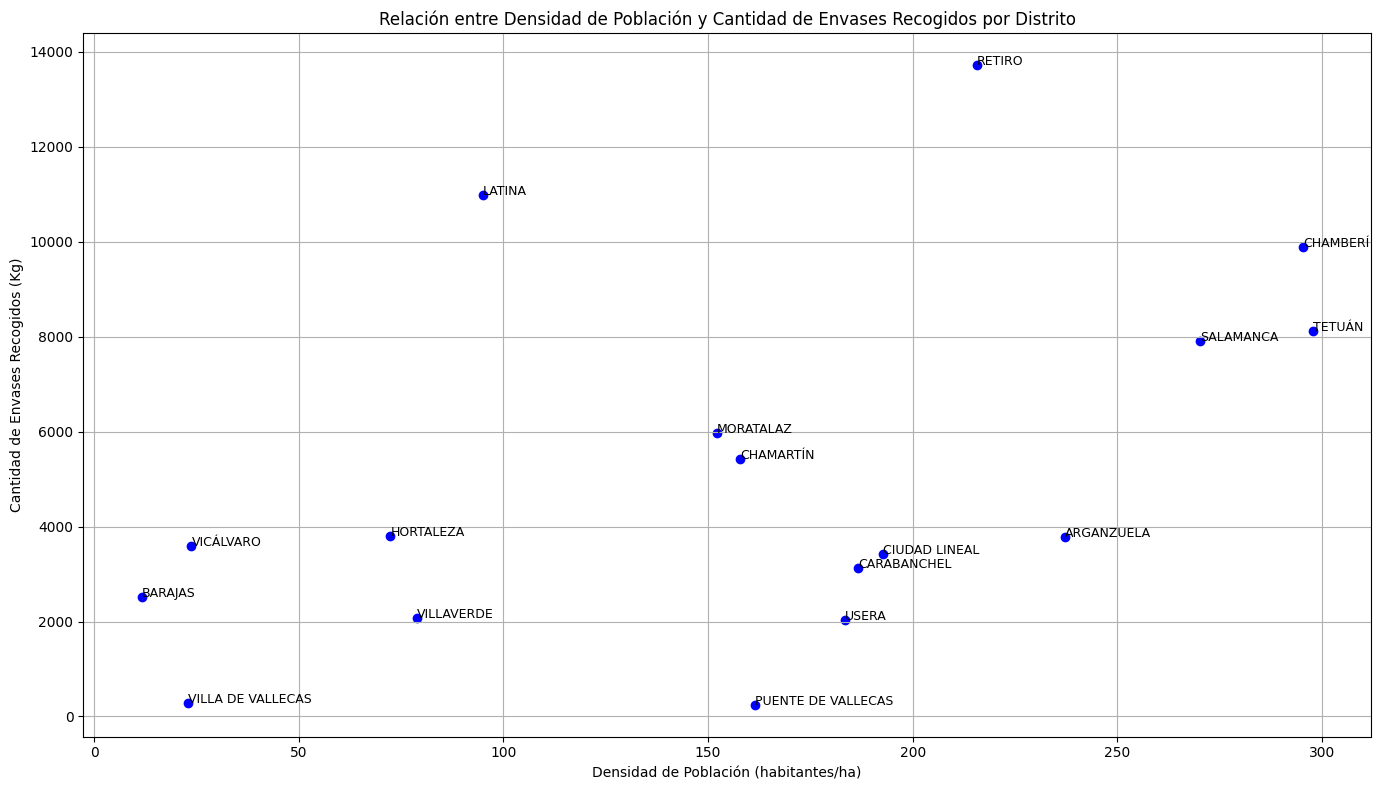

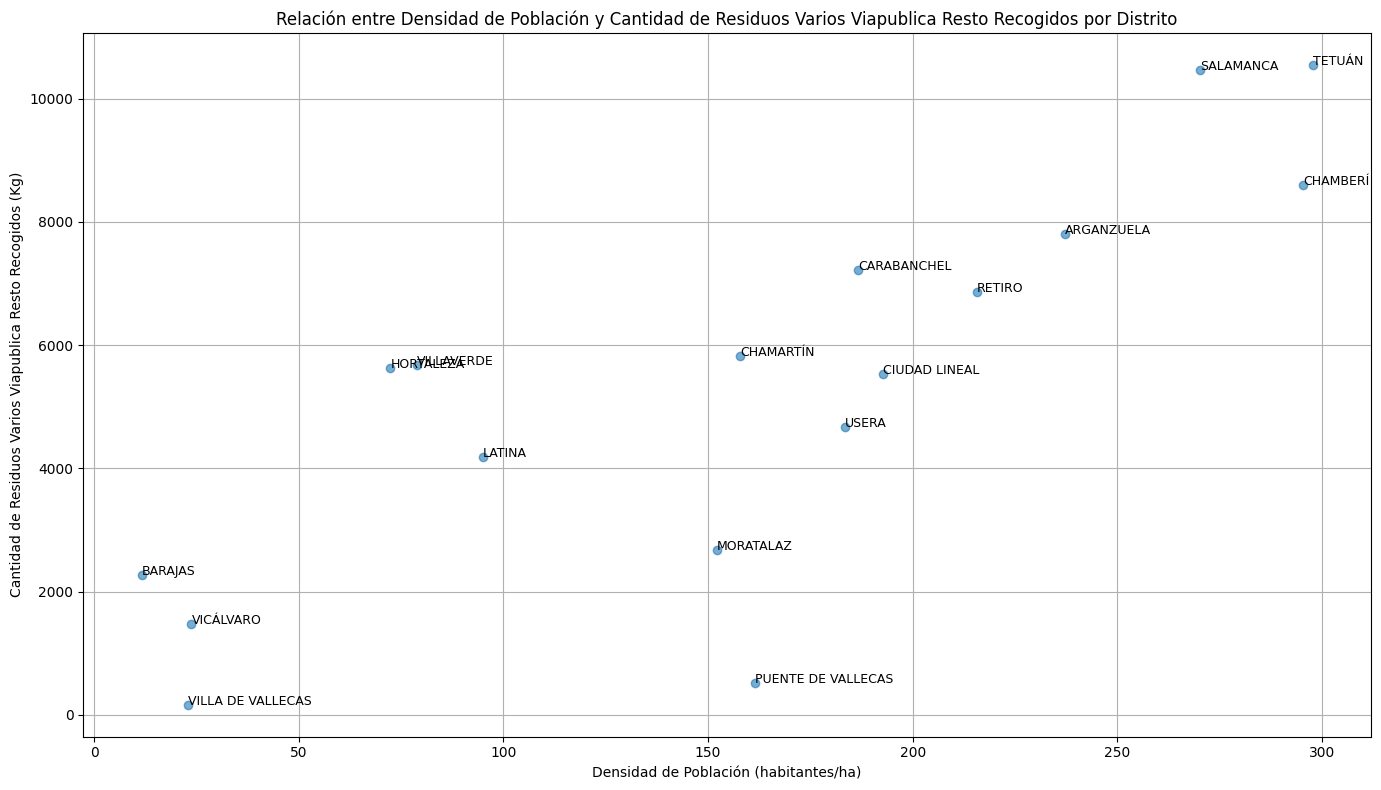

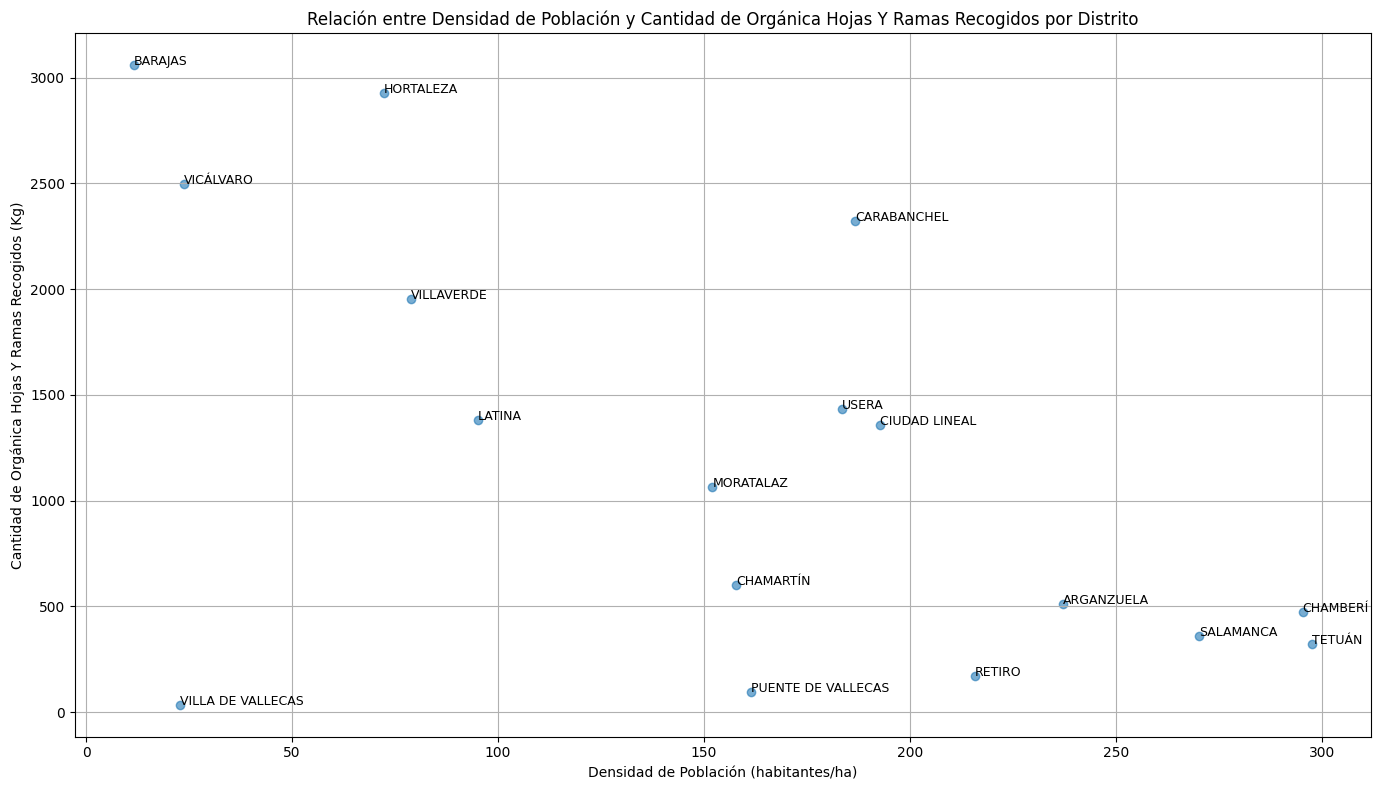

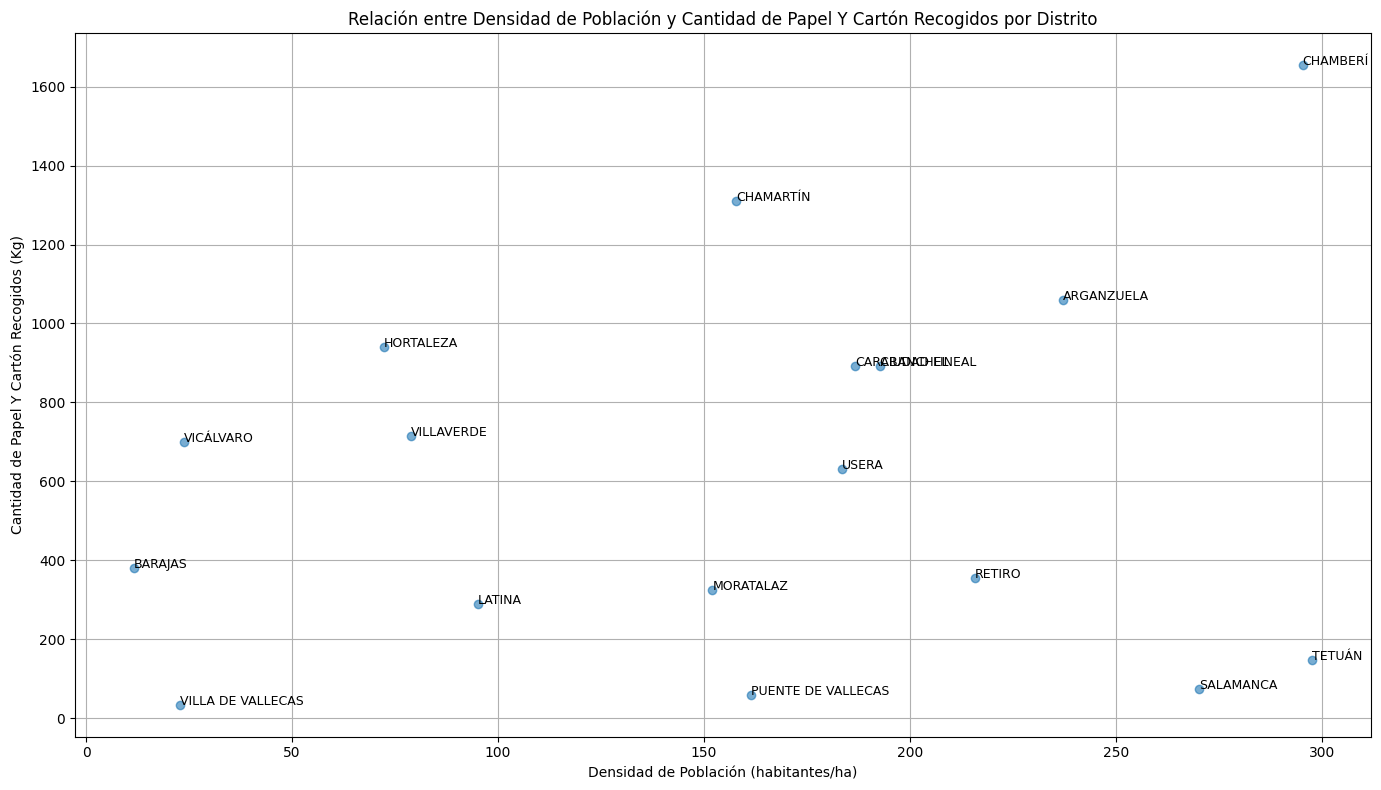

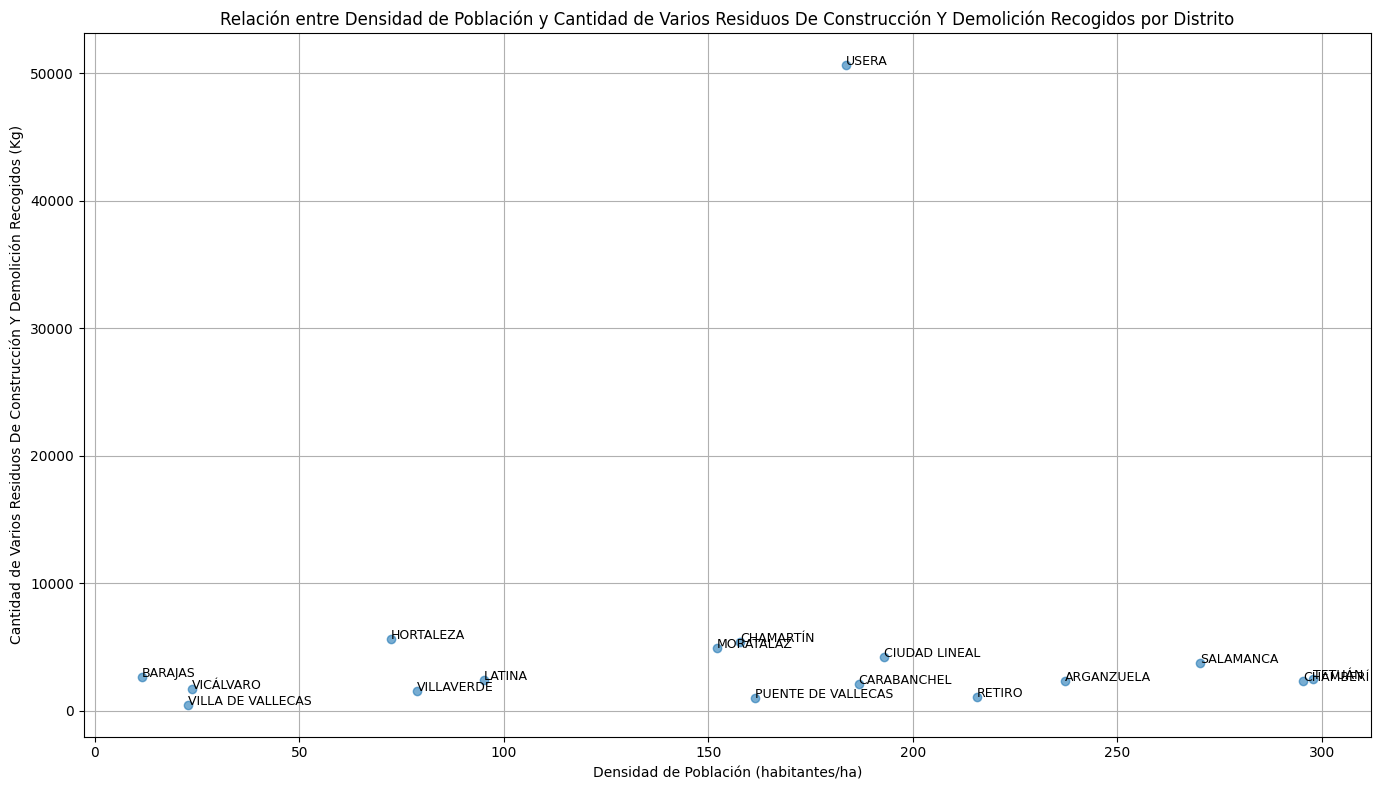

In [26]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 8))
plt.scatter(df_combined_distritos['densidad'], df_combined_distritos['envases'], color='blue')

# Añadir etiquetas de distrito
for i, row in df_combined_distritos.iterrows():
    plt.text(row['densidad'], row['envases'], row['distrito'], fontsize=9)

# Añadir título y etiquetas
plt.title('Relación entre Densidad de Población y Cantidad de Envases Recogidos por Distrito')
plt.xlabel('Densidad de Población (habitantes/ha)')
plt.ylabel('Cantidad de Envases Recogidos (Kg)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Crear el gráfico de dispersión para otros residuos importantes
residuos_importantes = ['residuos_varios_viapublica_resto','orgánica_hojas_y_ramas', 'papel_y_cartón', 'varios_residuos_de_construcción_y_demolición']

for residuo in residuos_importantes:
    plt.figure(figsize=(14, 8))
    plt.scatter(df_combined_distritos['densidad'], df_combined_distritos[residuo], label=residuo.replace('_', ' ').title(), alpha=0.6)

    # Añadir etiquetas de distrito
    for i, row in df_combined_distritos.iterrows():
        plt.text(row['densidad'], row[residuo], row['distrito'], fontsize=9)

    # Añadir título y etiquetas
    plt.title(f'Relación entre Densidad de Población y Cantidad de {residuo.replace("_", " ").title()} Recogidos por Distrito')
    plt.xlabel('Densidad de Población (habitantes/ha)')
    plt.ylabel(f'Cantidad de {residuo.replace("_", " ").title()} Recogidos (Kg)')
    plt.grid(True)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

### **Distritos destacados:** 🌟

#### **Mayor densidad y residuos**

**Centro:** Destaca como el distrito con mayor densidad de población (cerca de 280 hab/ha) y también como el mayor generador de residuos (aproximadamente 190 kg/hab/año).

**Chamberí:** Sigue a Centro tanto en densidad (alrededor de 240 hab/ha) como en generación de residuos (cerca de 170 kg/hab/año).

#### **Casos particulares**

**Salamanca:** A pesar de tener una densidad de población menor que Chamberí, genera una cantidad similar de residuos por habitante.

**Moncloa-Aravaca:** Muestra una baja densidad de población pero una generación de residuos relativamente alta en comparación.

#### **Tendencias observadas**

**Correlación general:** En la mayoría de los distritos, se observa que a mayor densidad de población, mayor es la cantidad de residuos generados por habitante.

**Excepciones:** Algunos distritos rompen esta tendencia, sugiriendo que otros factores además de la densidad poblacional influyen en la generación de residuos.

**Distritos periféricos:** Tienden a tener menor densidad de población y menor generación de residuos por habitante, como se observa en Vicálvaro, Villa de Vallecas y Barajas.

**Variabilidad en distritos céntricos:** Los distritos más céntricos muestran una mayor variabilidad en la relación densidad-residuos, posiblemente debido a factores como la actividad comercial o turística.

### **Conclusiones:**

El análisis revela que, si bien existe una correlación general entre la densidad de población y la generación de residuos, esta relación no es uniforme en todos los distritos. Factores adicionales como la actividad económica, el perfil socioeconómico de los habitantes, o la presencia de zonas comerciales y turísticas podrían explicar las variaciones observadas. Este estudio proporciona información valiosa para la planificación de la gestión de residuos en Madrid, sugiriendo que las estrategias deben adaptarse a las características específicas de cada distrito.

### **4. Estadistica Avanzada**

In [ ]:
# Install the missing package
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Estadísticas descriptivas:
         densidad  total_residuos
count  501.000000      501.000000
mean   163.847573    21775.338856
std     89.540230    12187.951930
min     11.603710     1142.394000
25%     78.780043    16402.517000
50%    183.532407    20586.284000
75%    237.231902    24188.200000
max    297.694755    63353.884000
range  286.091045    62211.490000

Valores atípicos (outliers):
densidad           0
total_residuos    39
dtype: int64

Prueba de Shapiro-Wilk para normalidad:
Densidad: W=nan, p-value=nan
Total Residuos: W=nan, p-value=nan

Coeficiente de correlación (Spearman):
Correlación: nan, p-value: nan
No rechazamos la hipótesis nula: No existe una correlación significativa.

Resumen del modelo de regresión lineal:
                            OLS Regression Results                            
Dep. Variable:         total_residuos   R-squared:                       0.118
Model:                           

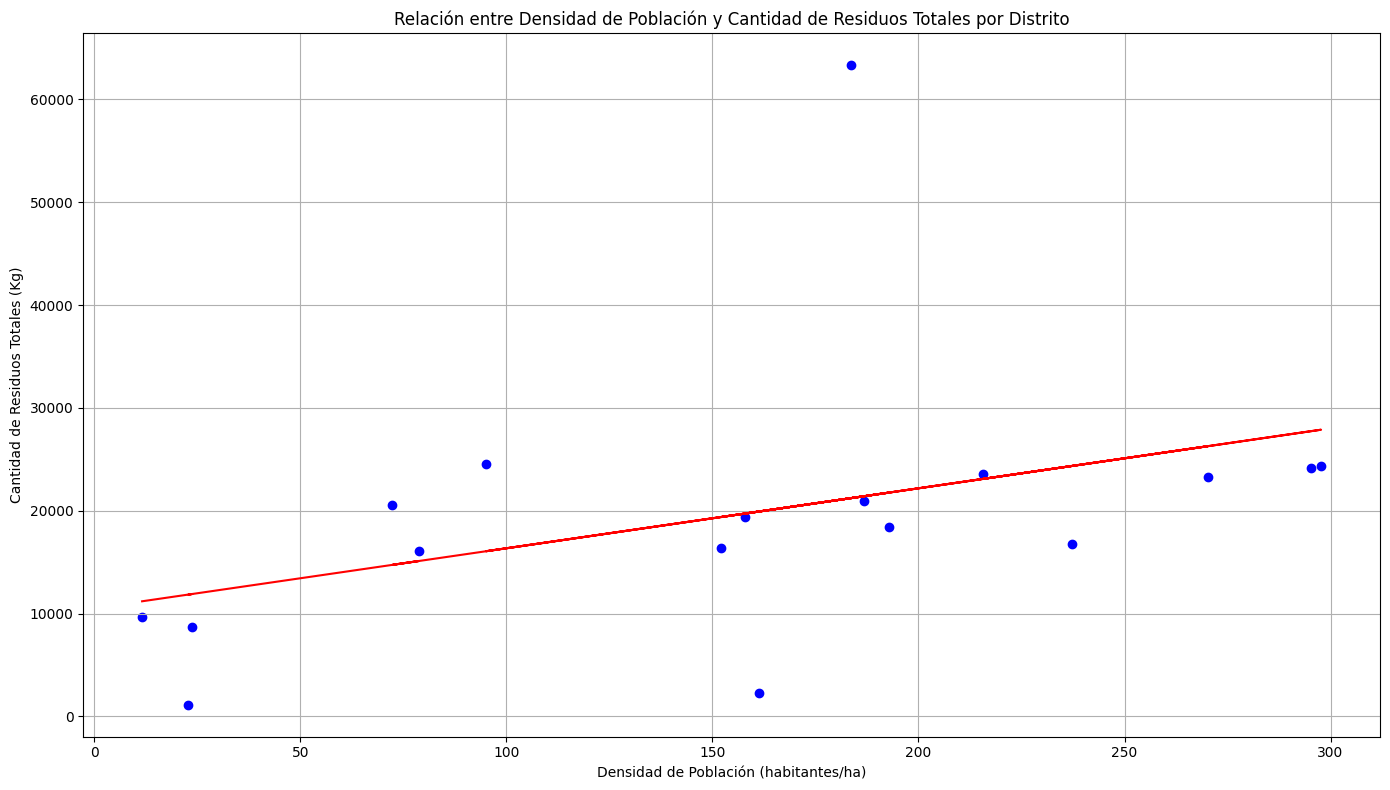

Estadísticas descriptivas:
         densidad  total_residuos
count   17.000000       17.000000
mean   156.176004    19628.079941
std     93.058969    13476.260653
min     11.603710     1142.394000
25%     78.780043    16062.294000
50%    161.406544    19382.648000
75%    215.722074    23597.538000
max    297.694755    63353.884000
range  286.091045    62211.490000

Valores atípicos (outliers):
densidad          0
total_residuos    3
dtype: int64

Prueba de Shapiro-Wilk para normalidad:
Densidad: W=0.9447579401576501, p-value=0.3790323617567901
Total Residuos: W=0.771737616282586, p-value=0.000852681254724138

Coeficiente de correlación (Spearman):
Correlación: 0.5980392156862745, p-value: 0.011221090083450312
Rechazamos la hipótesis nula: Existe una correlación significativa.

Resumen del modelo de regresión lineal:
                            OLS Regression Results                            
Dep. Variable:         total_residuos   R-squared:                       0.162
Model:        

/Users/iborja/.pyenv/versions/3.12.6/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [29]:
# Supongamos que df_combined_distritos tiene las columnas 'distrito', 'densidad' y 'total_residuos'
# Unir df_combined con df_combined_distritos en la columna 'distrito'
df_combined = df_combined.merge(df_combined_distritos[['distrito', 'densidad', 'total_residuos']], on='distrito', how='left')

# Estadísticas descriptivas
descriptive_stats = df_combined[variables].describe()
descriptive_stats.loc['range'] = descriptive_stats.loc['max'] - descriptive_stats.loc['min']
print("Estadísticas descriptivas:")
print(descriptive_stats)

# Identificar valores atípicos (outliers)
Q1 = df_combined[variables].quantile(0.25)
Q3 = df_combined[variables].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_combined[variables] < (Q1 - 1.5 * IQR)) | (df_combined[variables] > (Q3 + 1.5 * IQR))).sum()
print("\nValores atípicos (outliers):")
print(outliers)

# Prueba de normalidad
shapiro_densidad = stats.shapiro(df_combined['densidad'])
shapiro_residuos = stats.shapiro(df_combined['total_residuos'])
print("\nPrueba de Shapiro-Wilk para normalidad:")
print(f"Densidad: W={shapiro_densidad[0]}, p-value={shapiro_densidad[1]}")
print(f"Total Residuos: W={shapiro_residuos[0]}, p-value={shapiro_residuos[1]}")

# Coeficiente de correlación
if shapiro_densidad[1] > 0.05 and shapiro_residuos[1] > 0.05:
    corr, p_value = stats.pearsonr(df_combined['densidad'], df_combined['total_residuos'])
    method = 'Pearson'
else:
    corr, p_value = stats.spearmanr(df_combined['densidad'], df_combined['total_residuos'])
    method = 'Spearman'
print(f"\nCoeficiente de correlación ({method}):")
print(f"Correlación: {corr}, p-value: {p_value}")

# Prueba de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una correlación significativa.")
else:
    print("No rechazamos la hipótesis nula: No existe una correlación significativa.")

# Regresión lineal simple
X = df_combined[['densidad']]
y = df_combined['total_residuos']

# Eliminar filas con valores NaN
X = sm.add_constant(X)  # Agregar constante para el intercepto
X = X.dropna()
y = y[X.index]

model = sm.OLS(y, X).fit()
print("\nResumen del modelo de regresión lineal:")
print(model.summary())

# Interpretación de resultados
r_squared = model.rsquared
print(f"\nCoeficiente de determinación (R²): {r_squared}")
if p_value < alpha:
    print("El p-valor es menor que 0.05, rechazamos la hipótesis nula.")
    print(f"El coeficiente de correlación es {corr}, indicando una relación {'positiva' if corr > 0 else 'negativa'} entre densidad y total de residuos.")
    print(f"El R² de {r_squared} indica que aproximadamente el {r_squared*100:.2f}% de la variabilidad en los residuos totales puede explicarse por la densidad de población.")
else:
    print("El p-valor es mayor que 0.05, no rechazamos la hipótesis nula.")
    print("No se encontró una relación significativa entre densidad y total de residuos.")
    # Visualización de datos
    plt.figure(figsize=(14, 8))
    plt.scatter(df_combined_distritos['densidad'], df_combined_distritos['total_residuos'], color='blue')
    plt.title('Relación entre Densidad de Población y Cantidad de Residuos Totales por Distrito')
    plt.xlabel('Densidad de Población (habitantes/ha)')
    plt.ylabel('Cantidad de Residuos Totales (Kg)')
    plt.grid(True)

    # Añadir línea de tendencia
    m, b = np.polyfit(df_combined_distritos['densidad'], df_combined_distritos['total_residuos'], 1)
    plt.plot(df_combined_distritos['densidad'], m * df_combined_distritos['densidad'] + b, color='red')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    variables = ['densidad', 'total_residuos']
    descriptive_stats = df_combined_distritos[variables].describe()
    descriptive_stats.loc['range'] = descriptive_stats.loc['max'] - descriptive_stats.loc['min']
    print("Estadísticas descriptivas:")
    print(descriptive_stats)

    # Identificar valores atípicos (outliers)
    Q1 = df_combined_distritos[variables].quantile(0.25)
    Q3 = df_combined_distritos[variables].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_combined_distritos[variables] < (Q1 - 1.5 * IQR)) | (df_combined_distritos[variables] > (Q3 + 1.5 * IQR))).sum()
    print("\nValores atípicos (outliers):")
    print(outliers)

    # Prueba de normalidad
    shapiro_densidad = stats.shapiro(df_combined_distritos['densidad'])
    shapiro_residuos = stats.shapiro(df_combined_distritos['total_residuos'])
    print("\nPrueba de Shapiro-Wilk para normalidad:")
    print(f"Densidad: W={shapiro_densidad[0]}, p-value={shapiro_densidad[1]}")
    print(f"Total Residuos: W={shapiro_residuos[0]}, p-value={shapiro_residuos[1]}")

    # Coeficiente de correlación
    if shapiro_densidad[1] > 0.05 and shapiro_residuos[1] > 0.05:
        corr, p_value = stats.pearsonr(df_combined_distritos['densidad'], df_combined_distritos['total_residuos'])
        method = 'Pearson'
    else:
        corr, p_value = stats.spearmanr(df_combined_distritos['densidad'], df_combined_distritos['total_residuos'])
        method = 'Spearman'
    print(f"\nCoeficiente de correlación ({method}):")
    print(f"Correlación: {corr}, p-value: {p_value}")

    # Prueba de significancia
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una correlación significativa.")
    else:
        print("No rechazamos la hipótesis nula: No existe una correlación significativa.")

    # Regresión lineal simple
    X = df_combined_distritos[['densidad']]
    y = df_combined_distritos['total_residuos']

    # Eliminar filas con valores NaN
    X = sm.add_constant(X)  # Agregar constante para el intercepto
    X = X.dropna()
    y = y[X.index]

    model = sm.OLS(y, X).fit()
    print("\nResumen del modelo de regresión lineal:")
    print(model.summary())

    # Interpretación de resultados
    r_squared = model.rsquared
    print(f"\nCoeficiente de determinación (R²): {r_squared}")
    if p_value < alpha:
        print("El p-valor es menor que 0.05, rechazamos la hipótesis nula.")
        print(f"El coeficiente de correlación es {corr}, indicando una relación {'positiva' if corr > 0 else 'negativa'} entre densidad y total de residuos.")
        print(f"El R² de {r_squared} indica que aproximadamente el {r_squared*100:.2f}% de la variabilidad en los residuos totales puede explicarse por la densidad de población.")
    else:
        print("El p-valor es mayor que 0.05, no rechazamos la hipótesis nula.")
        print("No se encontró una relación significativa entre densidad y total de residuos.")

## **Estadísticas descriptivas:**

Las estadísticas descriptivas nos proporcionan una visión general de las variables 'densidad' y 'total_residuos':

- Tenemos 17 observaciones para cada variable.
- La densidad media es de 156.18 hab/ha, con una desviación estándar de 93.06 hab/ha.
- El total de residuos medio es de 19,628.08 kg, con una desviación estándar de 13,476.26 kg.
- La densidad varía desde un mínimo de 11.60 hab/ha hasta un máximo de 297.69 hab/ha.
- El total de residuos oscila entre 1,142.39 kg y 63,353.88 kg.
- El rango de densidad es 286.09 hab/ha, mientras que el de residuos es 62,211.49 kg.

Estas estadísticas indican una gran variabilidad tanto en la densidad poblacional como en la generación de residuos entre los distritos de Madrid.

### **Valores atípicos:**

Se detectaron 3 valores atípicos en la variable 'total_residuos', lo que sugiere que algunos distritos tienen una producción de residuos significativamente diferente a la tendencia general. Esto podría deberse a factores específicos de esos distritos que merecen un análisis más detallado.

#### Prueba de normalidad de Shapiro-Wilk

- Para la densidad: W = 0.9448, p-valor = 0.3790
    - Como el p-valor > 0.05, no podemos rechazar la hipótesis de normalidad para la densidad.
- Para el total de residuos: W = 0.7717, p-valor = 0.0009
    - El p-valor < 0.05 indica que la distribución de residuos totales se desvía significativamente de la normalidad.

Esta información es crucial para determinar qué pruebas estadísticas son apropiadas para el análisis posterior.

### **Análisis de Correlación:**

#### Coeficiente de correlación de Spearman

- Correlación: 0.5980
- P-valor: 0.0112

El coeficiente de correlación de Spearman se utiliza debido a la no normalidad de la variable 'total_residuos'. El valor de 0.5980 indica una correlación positiva moderada entre la densidad de población y la generación de residuos. El p-valor < 0.05 nos permite rechazar la hipótesis nula, concluyendo que existe una correlación significativa entre estas variables.

### **Modelo de Regresión Lineal:**

#### **Resumen del modelo:**

- R-cuadrado: 0.162
- R-cuadrado ajustado: 0.106
- Estadístico F: 2.902
- Prob (F-estadístico): 0.109

El modelo de regresión lineal muestra que:

- Aproximadamente el 16.21% de la variabilidad en los residuos totales puede explicarse por la densidad de población (R-cuadrado = 0.162).
- La ecuación del modelo es: Total Residuos = 10,520 + 58.306 * Densidad
- El p-valor del modelo (0.109) es mayor que 0.05, lo que sugiere que el modelo lineal no es estadísticamente significativo al nivel de confianza del 95%.

### **Conclusiones:**

- Existe una correlación positiva moderada entre la densidad poblacional y la generación de residuos en los distritos de Madrid.
- La relación entre densidad y generación de residuos no es estrictamente lineal, lo que explica el bajo R-cuadrado y la falta de significancia del modelo lineal.
- La presencia de valores atípicos y la no normalidad de los residuos totales sugieren la necesidad de técnicas más robustas o no paramétricas para un análisis más preciso.

### **Distritos con valores atípicos:**

#### Usera
Este distrito destaca por una generación de residuos significativamente mayor a la esperada según su densidad poblacional. Observamos que:
- Tiene una alta cantidad de residuos de construcción y demolición (50,679.805 kg), muy por encima de otros distritos.
- Esto podría indicar un proceso de renovación urbana o grandes obras de infraestructura en el distrito.

#### Retiro
Presenta una cantidad de envases recogidos (13,724.200 kg) notablemente superior a otros distritos con densidad similar. Esto podría deberse a:
- Mayor conciencia ambiental y mejores hábitos de reciclaje entre sus habitantes.
- Presencia de zonas comerciales o de ocio que generan más envases.

#### Puente de Vallecas
Muestra una generación de residuos totales sorprendentemente baja (2,350.226 kg) para su población. Esto podría explicarse por:
- Posibles deficiencias en la recogida de datos o en el sistema de recolección de residuos.
- Un perfil socioeconómico que resulte en menor consumo y generación de residuos.

### **Factores influyentes en la generación de residuos:**

#### **Nivel socioeconómico:**
- Distritos como Salamanca y Chamartín, conocidos por su alto nivel socioeconómico, muestran una generación de residuos per cápita más alta en ciertas categorías como papel y cartón.


#### **Zonas comerciales:**
- Centro y Salamanca, con alta concentración de comercios, presentan mayores cantidades de residuos de envases y papel/cartón.

#### **Áreas verdes:**
- Distritos como Moncloa-Aravaca y Fuencarral-El Pardo, con grandes zonas verdes, muestran una mayor generación de residuos orgánicos (hojas y ramas).

#### **Demografía:**
- Distritos con población más joven como Villaverde o Usera tienden a generar más residuos de envases.

## <p align="center">**Acontecimientos urbanísticos y socioculturales previstos para 2025:** 🏙️</p>

<p align="center">
    <img src="chinese_new_year.jpg" alt="Chinese New Year Celebrations" />
</p>

Aquí os presentamos un resumen de las conclusiones más relevantes por distrito y época del año:

#### **Centro y Arganzuela:**

**Invierno** ❄️
- El distrito Centro será el epicentro de las celebraciones del Año Nuevo Chino a finales de enero, con un aumento significativo de actividades culturales y afluencia de visitantes.
- Apertura del nuevo Museo Banksy en Arganzuela a principios de año, lo que potenciará la oferta cultural del distrito.

**Primavera-Verano** 🌸🌞
- Se espera un incremento en la generación de residuos en el distrito Centro durante las fiestas de San Isidro en mayo.

#### **Usera:**

**Invierno** ❄️
- El barrio será el corazón de las celebraciones del Año Nuevo Chino a finales de enero, con un gran desfile y numerosas actividades culturales.

#### **Moncloa-Aravaca y Fuencarral-El Pardo:**

**Todo el año** 🌸🌞🍂❄️
- Avance continuo del proyecto Madrid Nuevo Norte, que transformará significativamente estos distritos con la construcción de 10,500 nuevas viviendas y un centro de negocios.

#### **Villa de Vallecas y Vicálvaro:**

**Todo el año** 🌸🌞🍂❄️
- Desarrollo del proyecto Valdecarros, que añadirá 51,656 viviendas y capacidad para 150,000 nuevos habitantes, impactando significativamente en la demografía y servicios de estos distritos.

#### **Puente de Vallecas:**

**Primavera-Verano** 🌸🌞
- Posible aumento en la generación de residuos debido a la finalización de las primeras fases del proyecto Los Berrocales, que comenzará a recibir residentes en 2025.

#### **Carabanchel:**

**Todo el año** 🌸🌞🍂❄️
- Inicio del desarrollo urbano en los terrenos de la antigua cárcel de Carabanchel, con la construcción de 640 nuevas viviendas.

#### **Latina:**

**Verano** 🌞
- El distrito acogerá parte de las actividades del festival Veranos de la Villa, aumentando su actividad cultural.

### **Conclusiones generales:**

- Los distritos del norte y sureste de Madrid experimentarán los mayores cambios urbanísticos debido a los grandes proyectos de desarrollo como Madrid Nuevo Norte y Valdecarros.
- Se prevé un aumento en la generación de residuos en los distritos con nuevos desarrollos urbanísticos, especialmente en Villa de Vallecas y Vicálvaro.
- Los distritos centrales, especialmente Centro y Usera, mantendrán su importancia como focos de actividad cultural, con eventos destacados como el Año Nuevo Chino y las fiestas de San Isidro.
- La apertura de nuevos espacios culturales, como el Museo Banksy en Arganzuela, diversificará la oferta cultural más allá del centro tradicional.
- Los grandes proyectos urbanísticos como Madrid Nuevo Norte y Valdecarros tendrán un impacto significativo en la distribución demográfica y la demanda de servicios en los distritos afectados.